# Hospitalization EDA & Wrangling

This notebook focuses in the exploratory data analysis of the hospitalization features.

**Findings & Accomplishments:** 

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import rcParams
from scipy import stats

**Set Matplot Lib & Seaborn Styles** 

In [2]:
#Set Graphs style

rcParams['figure.figsize'] = 12, 12

rcParams['font.size'] = 12

sns.set(style='darkgrid')

sns.set_style({"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context("talk", font_scale=1.5)

## Upload Random Sampled Data

Upload diagnosis columns from the random sample created from the AIH 2015 - 2018 files.

In [3]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')


# Patient hospitalization columns 

hospi = ['ANO_CMPT','MES_CMPT','CGC_HOSP',
        'UTI_MES_TO','MARCA_UTI','UTI_INT_TO',
        'DIAR_ACOM','QT_DIARIAS','PROC_SOLIC',
        'PROC_REA','DT_INTER','DT_SAIDA','COBRANCA',
        'IND_VDRL','DIAS_PERM','CONTRACEP1','CONTRACEP2',
        'INSC_PN','CID_ASSO','CID_MORTE','COMPLEX',
        'MARCA_UCI','ESPEC','CAR_INT']


hospi_data = pd.read_csv(AIH_sample_path, 
                        encoding = 'UTF-8', 
                        na_values= ['NaN',' ',''],
                        usecols = hospi)

<string>:2: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 1min 54s, sys: 19.7 s, total: 2min 14s
Wall time: 2min 32s


In [4]:
hospi_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16614830 entries, 0 to 16614829
Data columns (total 24 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
ESPEC         16614830 non-null int64
CGC_HOSP      12629682 non-null float64
UTI_MES_TO    16614830 non-null int64
MARCA_UTI     16614830 non-null int64
UTI_INT_TO    16614830 non-null int64
DIAR_ACOM     16614830 non-null int64
QT_DIARIAS    16614830 non-null int64
PROC_SOLIC    16614830 non-null int64
PROC_REA      16614830 non-null int64
DT_INTER      16614830 non-null int64
DT_SAIDA      16614830 non-null int64
COBRANCA      16614830 non-null int64
IND_VDRL      16614830 non-null int64
DIAS_PERM     16614830 non-null int64
CAR_INT       16614830 non-null int64
CONTRACEP1    16614830 non-null int64
CONTRACEP2    16614830 non-null int64
INSC_PN       16614830 non-null int64
CID_ASSO      16614830 non-null int64
CID_MORTE     16614830 non-null int64
COMPLEX       16614830 non-null int64
MARCA_UCI

## Hospitalization Data Bloc Initial Exploration

**Hospitalization Data Descriptive Statistics**

In [5]:
hospi_data.describe()

ANO_CMPT      MES_CMPT         ESPEC      CGC_HOSP    UTI_MES_TO  \
count  1.661483e+07  1.661483e+07  1.661483e+07  1.262968e+07  1.661483e+07   
mean   2.016326e+03  6.101982e+00  2.857979e+00  3.574231e+13  4.613846e-01   
std    1.052621e+00  3.348307e+00  3.449547e+00  2.887393e+13  2.893281e+00   
min    2.015000e+03  1.000000e+00  1.000000e+00  2.982700e+10  0.000000e+00   
25%    2.015000e+03  3.000000e+00  1.000000e+00  1.057205e+13  0.000000e+00   
50%    2.016000e+03  6.000000e+00  3.000000e+00  2.708061e+13  0.000000e+00   
75%    2.017000e+03  9.000000e+00  3.000000e+00  5.598978e+13  0.000000e+00   
max    2.018000e+03  1.200000e+01  8.700000e+01  9.871488e+13  3.020000e+02   

          MARCA_UTI    UTI_INT_TO     DIAR_ACOM    QT_DIARIAS    PROC_SOLIC  \
count  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07   
mean   4.841298e+00  4.942368e-02  1.945878e+00  4.959391e+00  3.453976e+08   
std    1.863319e+01  9.259680e-01  4.384568e+00  7.258404e+00  5.268186e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.010100e+08   
25%    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  3.031000e+08   
50%    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00  3.080100e+08   
75%    0.000000e+00  0.000000e+00  2.000000e+00  5.000000e+00  4.080204e+08   
max    9.900000e+01  2.280000e+02  3.400000e+02  3.650000e+02  5.060201e+08   

           ...           COBRANCA      IND_VDRL     DIAS_PERM       CAR_INT  \
count      ...       1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07   
mean       ...       2.321465e+01  1.570738e-01  5.392590e+00  1.829566e+00   
std        ...       1.859342e+01  3.638704e-01  8.022709e+00  5.443274e-01   
min        ...       1.100000e+01  0.000000e+00  0.000000e+00  1.000000e+00   
25%        ...       1.200000e+01  0.000000e+00  2.000000e+00  2.000000e+00   
50%        ...       1.200000e+01  0.000000e+00  3.000000e+00  2.000000e+00   
75%        ...       2.700000e+01  0.000000e+00  6.000000e+00  2.000000e+00   
max        ...       6.700000e+01  1.000000e+00  3.640000e+02  6.000000e+00   

         CONTRACEP1    CONTRACEP2       INSC_PN    CID_ASSO   CID_MORTE  \
count  1.661483e+07  1.661483e+07  1.661483e+07  16614830.0  16614830.0   
mean   7.057767e-02  4.647529e-02  5.644653e+09         0.0         0.0   
std    7.965424e-01  6.586532e-01  3.757986e+10         0.0         0.0   
min    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
25%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
50%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
75%    0.000000e+00  0.000000e+00  0.000000e+00         0.0         0.0   
max    1.200000e+01  1.200000e+01  1.000000e+12         0.0         0.0   

            COMPLEX  
count  1.661483e+07  
mean   2.070164e+00  
std    2.554226e-01  
min    2.000000e+00  
25%    2.000000e+00  
50%    2.000000e+00  
75%    2.000000e+00  
max    3.000000e+00  

[8 rows x 23 columns]

**Findings from Descriptive Statistics & Variable Explanation:**

+ ESPEC: Marker for specialty (type) of bed. Mean is 2.85. Max is 87, this is likely a mistake since according to the codebook this variable should go from 1 to 9.
+ CGC_HOSP: Id of the hospital. 
+ UTI_MES_TO: Number of intensive care unit days in a month. Mean is 0.461 days. Max is 302. 75th percentile is 0. 
+ UTI_INT_TO: Number of nights on a intermediary unit. Mean is 0.0494 nights. Max is 228 nights.
+ DIAR_ACOM: Number of companion nights. Mean is 1.94 nights. With 75% being at 2 nights. Max is 340. 
+ QT_DIARIAS: Number of nights. Mean is 4.95. 75th percentile is 5 nights. Max is 365.
+ PROC_SOLIC: Procedure requested code.
+ PROC_REA: Procedure performed code.
+ COBRANCA: Reason for exit/stay. 
+ IND_VDRL: VDRL exam indicator.
+ DIAS_PERM: Days of stay. Max is 364 which is highly improbable. 
+ CAR_INT: Character of hospitalization code.
+ CONTRACEP1 & CONTRACEP2: Contraception used codes. 
+ INSC_PN: Number of pregnant women in pre-natal care. 75th percentile is 0, Max is 1e+12 and mean is 5.64e+09. This variable looks off. 
+ CID_ASSO: CID_10 code of cause. This column is empty
+ CID_MORTE: CID code of death cause. This column is empty.
+ COMPLEX: complexity code.
+ MARCA_UCI: Type of intensive care unit used by the patient.
+ DT_SAIDA: Exit Date
+ DT_INTER: Entry Date.

### Hospitalization Data Wrangling

> **Drop empty redudant & suspect columns. Replace zeroes with np.nan where zeroes stand for empty and do not provide information.**

In [6]:
#Drop empty, nearly empty, redundant or suspect columns: 

drop_cols = ['DT_INTER', 'DT_SAIDA','INSC_PN','CID_ASSO','CID_MORTE','QT_DIARIAS']

hospi_data.drop(labels=drop_cols, axis=1, inplace = True)

> **Recode categorical variables**

In [7]:
# Especialty of the bed
# Create dictionary with categories

espec = {1:'Clínica cirúrgica', 2:'Obstetrícia', 3:'Clínica médica', 
         4:'Cuidados prolongados (crônicos)',5:'Psiquiatria', 
         6:'Pneumologia sanitária (tisiologia)',
         7:'Pediatria', 8:'Reabilitação',9:'Clínica cirúrgica - hospital-dia',
        10:'Aids - hospital-dia',11:'Fibrose cística - hospital-dia',
        12:'Intercorrência pós-transplante - hospital-dia',13:'Geriatria - hospital-dia',
        14:'Saúde mental - hospital-dia', 87:'Saúde mental - clínico', 0:np.nan}

# Map dictionary to a new column

hospi_data['espec_name'] = [espec[item] for item in hospi_data.ESPEC]

In [8]:
# Character of hospitalization
# Create dictionary with categories

car_int = {1:'elective', 2: 'urgent',3:'on-site work accident',
           4:'accident way to work',5:'transit accident',
           6:'lessions or poisoning', 0:np.nan}

# Map dictionary to a new column

hospi_data['car_int_name'] = [car_int[item] for item in hospi_data.CAR_INT]

In [9]:
# Complexity
# Create dictionary with categories

cpx = {1:'basic attention', 2: 'medium complexity', 3:'high complexity', 0: np.nan}

# Map dictionary to a new column

hospi_data['complex_name'] = [cpx[item] for item in hospi_data.COMPLEX]

In [10]:
#Reasons for stay/exit
#Upload reference codebook

cobranca_ref_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/cobranca_codebook.csv')

cobranca_ref = pd.read_csv(cobranca_ref_path)

hospi_data = pd.merge(hospi_data, cobranca_ref, 
                      how = 'left', left_on = 'COBRANCA', 
                      right_on = 'cobranca_code')

In [11]:
hospi_data.head()

ANO_CMPT  MES_CMPT  ESPEC      CGC_HOSP  UTI_MES_TO  MARCA_UTI  UTI_INT_TO  \
0      2015         8      3  6.092217e+13           0          0           0   
1      2015         8      7  3.947000e+11           0          0           0   
2      2015        10      2  6.097574e+13           0          0           0   
3      2015         3      1  4.938437e+12           0          0           0   
4      2015        12      1  1.984393e+13           0          0           0   

   DIAR_ACOM  PROC_SOLIC   PROC_REA  \
0          2   303100044  303100044   
1          3   303160047  303160047   
2          2   310010039  310010039   
3          3   408020423  408020423   
4          0   401020029  401020029   

                         ...                          CONTRACEP1  CONTRACEP2  \
0                        ...                                   0           0   
1                        ...                                   0           0   
2                        ...                                   0           0   
3                        ...                                   0           0   
4                        ...                                   0           0   

   COMPLEX  MARCA_UCI         espec_name  car_int_name       complex_name  \
0        2          0     Clínica médica        urgent  medium complexity   
1        2        0.0          Pediatria        urgent  medium complexity   
2        2          0        Obstetrícia        urgent  medium complexity   
3        2          0  Clínica cirúrgica        urgent  medium complexity   
4        2         00  Clínica cirúrgica        urgent  medium complexity   

           cobranca_group cobranca_code  \
0                Released          12.0   
1                Released          12.0   
2  Released to Recuperate          61.0   
3                Released          12.0   
4                Released          27.0   

                                       cobranca_name  
0                                         MELHORADO   
1                                         MELHORADO   
2  Em politraumatizado com < de 24 horas da 1a.ci...  
3                                         MELHORADO   
4                                                NaN  

[5 rows x 24 columns]

In [12]:
#The column has mixed types of numbers and text. In particular in zeroes. 

hospi_data['MARCA_UCI'].value_counts()

0       8660910
0.0     2890172
00      2568433
0.0     2366562
1         31541
3         15037
1.0       11543
1.0       11222
01         9902
2          4763
3.0        3001
03         2288
3.0        2170
02         2166
2.0        1835
2.0        1548
W199        910
V299        415
W999        355
X599        284
Y349        281
X590        212
W178        139
V99         117
X999        108
Y838        108
X959        107
Y86          86
V282         84
Y69          77
         ...   
Y000          1
Z525          1
Z524          1
G458          1
Z357          1
R509          1
X422          1
D439          1
V298          1
V171          1
X628          1
X943          1
S314          1
V476          1
A490          1
V300          1
I743          1
X650          1
X359          1
W205          1
I614          1
V181          1
W130          1
Y059          1
W081          1
V480          1
E106          1
G409          1
V916          1
Y229          1
Name: MARCA_UCI, Length:

In [13]:
hospi_data.drop(labels='MARCA_UCI', axis=1, inplace = True)

The data quality of the 'MARCA_UCI' feature is poor. The features are inconsistently coded and this feature is not critical to the analsyis. As such, I will drop it. Moreover, for the most part is empty (which makes sense since it provides additional information on type of intensive care unit, an especialized service used only by patients in critical condition. 

In [14]:
#Procedure Performed & Procedure Requested Correlation

np.corrcoef(x=hospi_data.PROC_REA, y= hospi_data.PROC_SOLIC)

array([[1.       , 0.9643257],
       [0.9643257, 1.       ]])

There is a strong linear relationship (collinearity) between procedure requested and procedure performed. This makes sense since the procedure requested is expected to have a strong relationsjip with the medical procedure ultimately performed. For this reason, I will drop the procedure requested feature since it will not provide meaningful additional information.

In [15]:
hospi_data.drop(labels='PROC_SOLIC', axis=1, inplace = True)

In [16]:
#Procedure Requested. Upload reference codebook & Merge with Data

procedures_ref_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/procedures_codebook.csv')

procedures_ref = pd.read_csv(procedures_ref_path)

hospi_data = pd.merge(hospi_data,procedures_ref, 
                      how = 'left', left_on = 'PROC_REA', 
                      right_on = 'proc_code')

In [17]:
hospi_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 25 columns):
ANO_CMPT          16614830 non-null int64
MES_CMPT          16614830 non-null int64
ESPEC             16614830 non-null int64
CGC_HOSP          12629682 non-null float64
UTI_MES_TO        16614830 non-null int64
MARCA_UTI         16614830 non-null int64
UTI_INT_TO        16614830 non-null int64
DIAR_ACOM         16614830 non-null int64
PROC_REA          16614830 non-null int64
COBRANCA          16614830 non-null int64
IND_VDRL          16614830 non-null int64
DIAS_PERM         16614830 non-null int64
CAR_INT           16614830 non-null int64
CONTRACEP1        16614830 non-null int64
CONTRACEP2        16614830 non-null int64
COMPLEX           16614830 non-null int64
espec_name        16614830 non-null object
car_int_name      16614830 non-null object
complex_name      16614830 non-null object
cobranca_group    16582615 non-null object
cobranca_code     16582615 non-null flo

### Create Categorical Variables for Hospitalization Data

In [18]:
# Specialty of Bed

hospi_data["ESPEC"] = hospi_data["ESPEC"].astype('category')

#CGC of the Hospital (i.e unique id of the hospital)

hospi_data["CGC_HOSP"] = hospi_data["CGC_HOSP"].astype('category')

# Procedure Solicited

hospi_data["PROC_REA"] = hospi_data["PROC_REA"].astype('category')

# Reason for stay/exit

hospi_data["COBRANCA"] = hospi_data["COBRANCA"].astype('category')

# VDRL exam indicator

hospi_data["IND_VDRL"] = hospi_data["IND_VDRL"].astype('category')

# VDRL exam indicator

hospi_data["CAR_INT"] = hospi_data["CAR_INT"].astype('category')

# Contraception used 1

hospi_data["CONTRACEP1"] = hospi_data["CONTRACEP1"].astype('category')

# Contraception used 2

hospi_data["CONTRACEP2"] = hospi_data["CONTRACEP2"].astype('category')

# Complexity of hospitalization

hospi_data["COMPLEX"] = hospi_data["COMPLEX"].astype('category')

# Reason stay/exit group

hospi_data["cobranca_group"] = hospi_data["cobranca_group"].astype('category')

# Reason stay/exit group

hospi_data["proc_group"] = hospi_data["proc_group"].astype('category')

# Procedure Solicited

hospi_data["proc_name"] = hospi_data["proc_name"].astype('category')

In [19]:
# Create new columns with numerical codes codes

# Specialty of Bed

hospi_data["ESPEC_CAT"] = hospi_data["ESPEC"].cat.codes

#CGC of the Hospital (i.e unique id of the hospital)

hospi_data["CGC_HOSP_CAT"] = hospi_data["CGC_HOSP"].cat.codes

# Procedure Solicited

hospi_data["PROC_REA_CAT"] = hospi_data["PROC_REA"].cat.codes

# Reason for stay/exit

hospi_data["COBRANCA_CAT"] = hospi_data["COBRANCA"].cat.codes

# VDRL exam indicator

hospi_data["IND_VDRL_CAT"] = hospi_data["IND_VDRL"].cat.codes

# Character of hospitalization

hospi_data["CAR_INT_CAT"] = hospi_data["CAR_INT"].cat.codes

# Contraception used 1

hospi_data["CONTRACEP1_CAT"] = hospi_data["CONTRACEP1"].cat.codes

# Contraception used 2

hospi_data["CONTRACEP2_CAT"] = hospi_data["CONTRACEP2"].cat.codes

# Complexity of hospitalization

hospi_data["COMPLEX_CAT"] = hospi_data["COMPLEX"].cat.codes

# Reason stay/exit group

hospi_data["cobranca_group_CAT"] = hospi_data["cobranca_group"].cat.codes

# Reason stay/exit group

hospi_data["proc_group_CAT"] = hospi_data["proc_group"].cat.codes

## Create Cleaned Hospitalization DataFrame

In [20]:
hospi_data = hospi_data[['ANO_CMPT','MES_CMPT','ESPEC_CAT', 'espec_name','CGC_HOSP_CAT',  
                         'UTI_MES_TO','MARCA_UTI','UTI_INT_TO','DIAR_ACOM','DIAS_PERM',
                         'PROC_REA_CAT','proc_name', 'proc_group_CAT','proc_group',
                         'COBRANCA_CAT','cobranca_name','cobranca_group_CAT','cobranca_group',
                         'IND_VDRL_CAT','CAR_INT_CAT','car_int_name','CONTRACEP1_CAT','CONTRACEP2_CAT',
                         'COMPLEX_CAT','complex_name']]

In [21]:
hospi_data.head(5)

ANO_CMPT  MES_CMPT  ESPEC_CAT         espec_name  CGC_HOSP_CAT  UTI_MES_TO  \
0      2015         8          2     Clínica médica          2578           0   
1      2015         8          6          Pediatria            39           0   
2      2015        10          1        Obstetrícia          2585           0   
3      2015         3          0  Clínica cirúrgica           529           0   
4      2015        12          0  Clínica cirúrgica          1521           0   

   MARCA_UTI  UTI_INT_TO  DIAR_ACOM  DIAS_PERM        ...          \
0          0           0          2          2        ...           
1          0           0          3          3        ...           
2          0           0          2          2        ...           
3          0           0          3          3        ...           
4          0           0          0         11        ...           

                                       cobranca_name cobranca_group_CAT  \
0                                         MELHORADO                   1   
1                                         MELHORADO                   1   
2  Em politraumatizado com < de 24 horas da 1a.ci...                  2   
3                                         MELHORADO                   1   
4                                                NaN                  1   

           cobranca_group IND_VDRL_CAT  CAR_INT_CAT car_int_name  \
0                Released            1            1       urgent   
1                Released            0            1       urgent   
2  Released to Recuperate            1            1       urgent   
3                Released            0            1       urgent   
4                Released            0            1       urgent   

   CONTRACEP1_CAT CONTRACEP2_CAT  COMPLEX_CAT       complex_name  
0               0              0            0  medium complexity  
1               0              0            0  medium complexity  
2               0              0            0  medium complexity  
3               0              0            0  medium complexity  
4               0              0            0  medium complexity  

[5 rows x 25 columns]

In [22]:
# The cat codes accesor codes missing as -1. Replace - 1 with np.nan's

hospi_data_clean = hospi_data.replace(to_replace = -1, value = np.nan)

In [23]:
hospi_data_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 25 columns):
ANO_CMPT              16614830 non-null int64
MES_CMPT              16614830 non-null int64
ESPEC_CAT             16614830 non-null int8
espec_name            16614830 non-null object
CGC_HOSP_CAT          12629682 non-null float64
UTI_MES_TO            16614830 non-null int64
MARCA_UTI             16614830 non-null int64
UTI_INT_TO            16614830 non-null int64
DIAR_ACOM             16614830 non-null int64
DIAS_PERM             16614830 non-null int64
PROC_REA_CAT          16614830 non-null int16
proc_name             16614830 non-null category
proc_group_CAT        16614830 non-null int8
proc_group            16614830 non-null category
COBRANCA_CAT          16614830 non-null int8
cobranca_name         16373099 non-null object
cobranca_group_CAT    16582615 non-null float64
cobranca_group        16582615 non-null category
IND_VDRL_CAT          16614830 non-null int8


## Prepare for Data and Functions for Exploration

> **Datasets by Year**

In [24]:
hospi_2015 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2015]

hospi_2016 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2016]

hospi_2017 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2017]

hospi_2018 = hospi_data_clean[hospi_data_clean['ANO_CMPT'] == 2018]

> **Define Data Exploration Helper Functions**

In [25]:
#Create function to do bar count plots of categorical variables.

def count_plot(df = None, col_name = None,title = 'Title Here',
               xlabel = '', ylabel = 'count',kind = 'bar'):
    
    '''Create bar count plots of categorical variables. 
    
       Return counts in x,xxx,xxx format'''
    
    ax = df[col_name].value_counts().plot(kind=kind)
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [26]:
#Create function to do bar count plots of categorical variables. It plots the most frequent items. 
# This is to plot features that have many categories and plotting all categories is not possible.

def count_plot_slice(df = None, col_name = None, head = 20, 
                     title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Plot count plots of the n-top items most frequent in an feature'''
    
    ax = df[col_name].value_counts().head(head).plot(kind='bar')
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [27]:
# Create function to count categorical values by category and year.

def count_plot_hue(df = None, col_name = None, 
                   hue = 'ANO_CMPT',title = 'Title Here', ylabel = '',
                   xlabel = 'count'):
               
    ax = sns.countplot(y= col_name, hue = hue, data= df)
    
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title, fontsize=14)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

In [28]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [29]:
def norm_dist_tests(df = None, col_name = None): 
    
    '''Calculate the 'D’Agostino and Pearson’s, Anderson-Darling and Basic Distrubition stats   '''
    
    # D’Agostino and Pearson’s Normality Test
    
    pearson = stats.normaltest(df[col_name])
    
    # Anderson-Darling Normality Test
    
    anderson = stats.anderson(df[col_name])
    
    # Distribution Stats
    
    dist_stats = stats.describe(df[col_name])
    
    # Print results
    
    print('D’Agostino and Pearson’s: ', pearson)
    
    print('Anderson-Darling: ', anderson)
    
    print('Distribution Statistics: ', dist_stats)

In [30]:
def theor_ecdf(df = None , col_name = None, seed = 42): 
    
    '''Calculate theortical normal distribution of a feature '''
    
    #Determine lenght of the series (to calculate number of samples needed)
    
    size_df = len(df)
    
    # Calculate mean and standard deviation
    
    mean_user_play = np.mean(df[col_name])
    
    std_user_play = np.std(df[col_name])
    
    # Set random seed 
    
    np.random.seed(seed)
    
    # Draw random normal samples
    
    samples = np.random.normal(mean_user_play, std_user_play, size=size_df)
    
    # Apply ecf function to theoritical samples

    x_theor, y_theor = ecdf(samples)
    
    return x_theor, y_theor

In [31]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [32]:
def boot_conf_int(ci = [2.5,97.5], mean_rep = None, mean = None, n_tries = 10000):
    
    #Bootstrap confidence interval
    
    ci = np.percentile(mean_rep,[2.5,97.5])
    
    pvalue = sum(mean_rep <= mean)/n_tries
    
    print('Bootstrap Mean Replicates 95% CI: ', ci)
    
    print('P-value of patient age mean replicates: ', pvalue)

# Data Exploration

## *Hospitalization Trends*

> **Plot Number of Hospitalizations by Year**

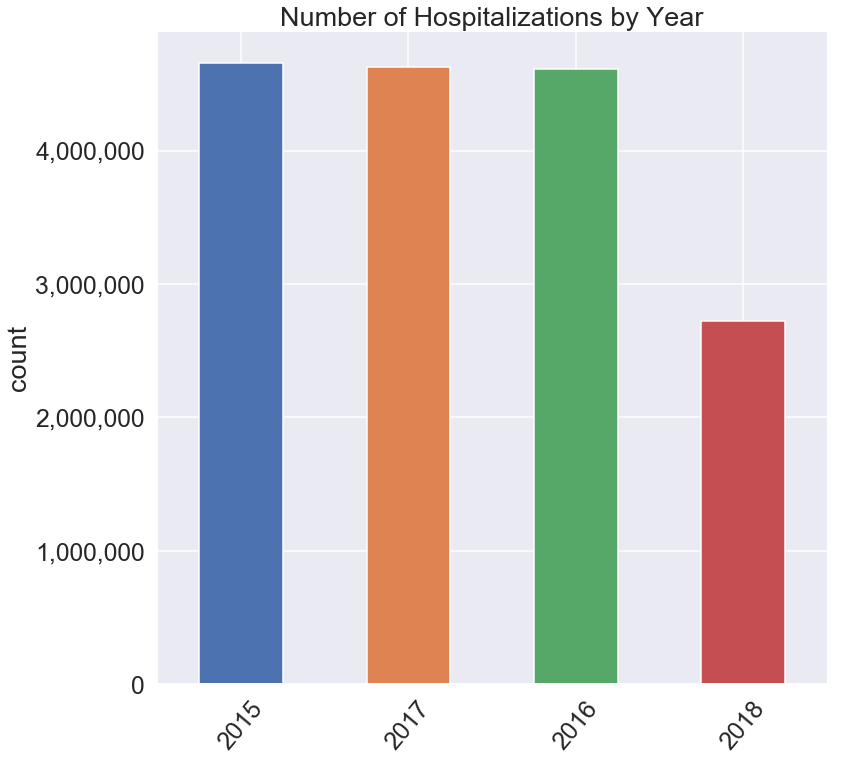

In [33]:
count_plot(df = hospi_data_clean, col_name = 'ANO_CMPT',
           title = 'Number of Hospitalizations by Year', xlabel = '', ylabel = 'count')

> **Plot Number of Hospitalizations by Month**

In [34]:
group_month = hospi_data_clean[['ANO_CMPT','MES_CMPT','ESPEC_CAT']].groupby(['ANO_CMPT','MES_CMPT'], as_index = False).count()

In [35]:
# Especialty of the bed
# Create dictionary with categories

month = {1:'January',2:'February', 3:'March', 4:'April', 5:'May',
         6:'June', 7:'July', 8:'August', 9: 'September', 10:'October', 
         11:'Novemeber', 12:'December'}

# Map dictionary to a new column

group_month['MES_CMPT'] = [month[item] for item in group_month.MES_CMPT]

Text(0,0.5,'Count of Hospitalizations')

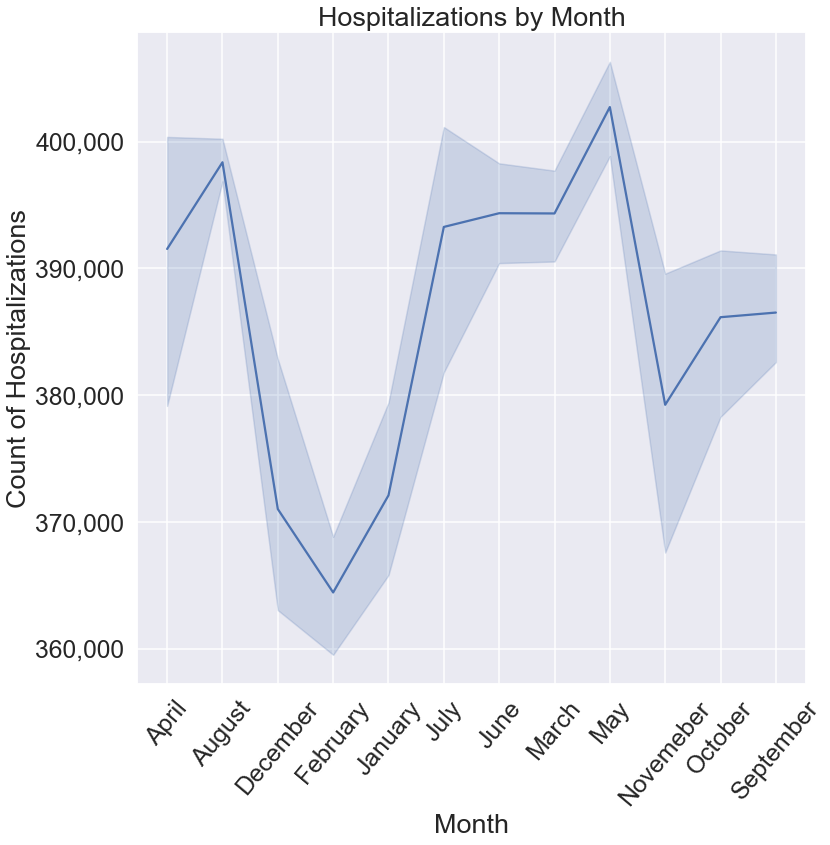

In [36]:
ax = sns.lineplot(x = group_month.MES_CMPT,  y = group_month.ESPEC_CAT, markers=True)

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

plt.title('Hospitalizations by Month')
plt.xlabel('Month')
plt.xticks(rotation = 50)
plt.ylabel('Count of Hospitalizations')

## *Especialty of Bed*

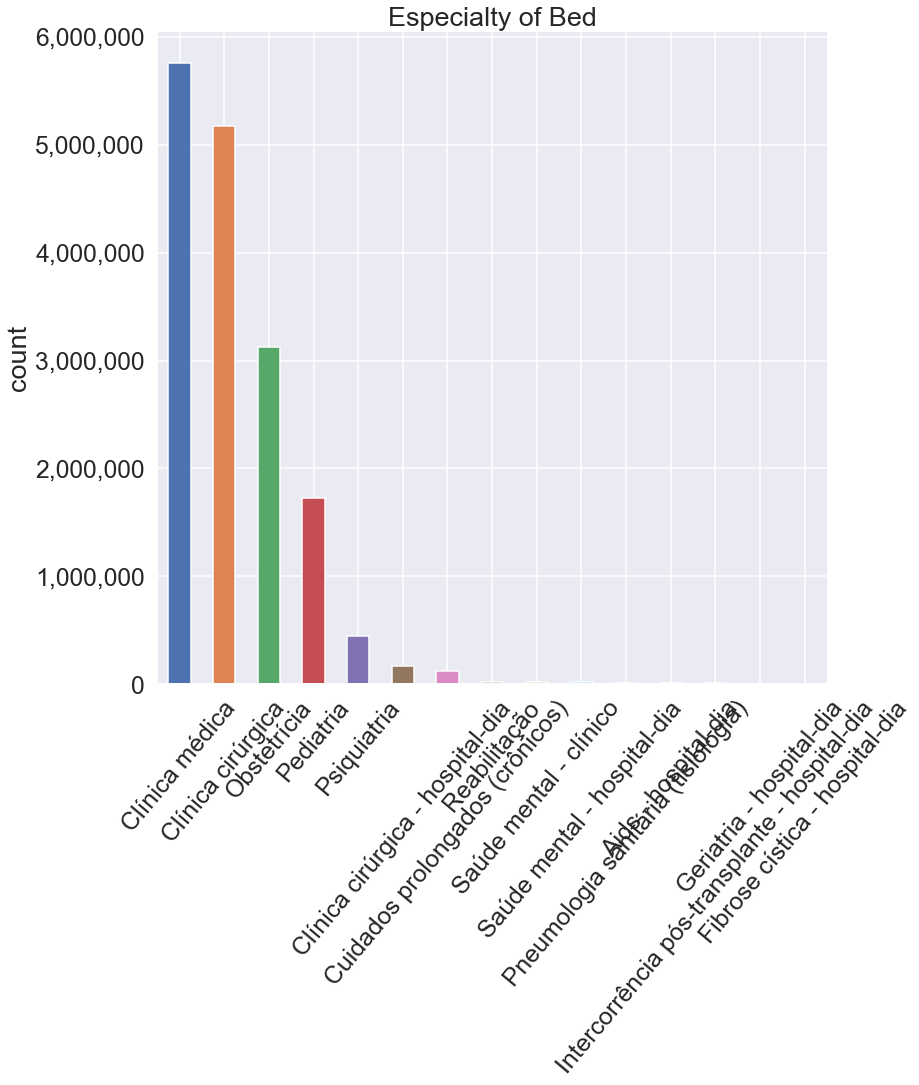

In [37]:
count_plot(df = hospi_data_clean, col_name = 'espec_name', title = "Especialty of Bed")

## *Hospitals with Most Cases*

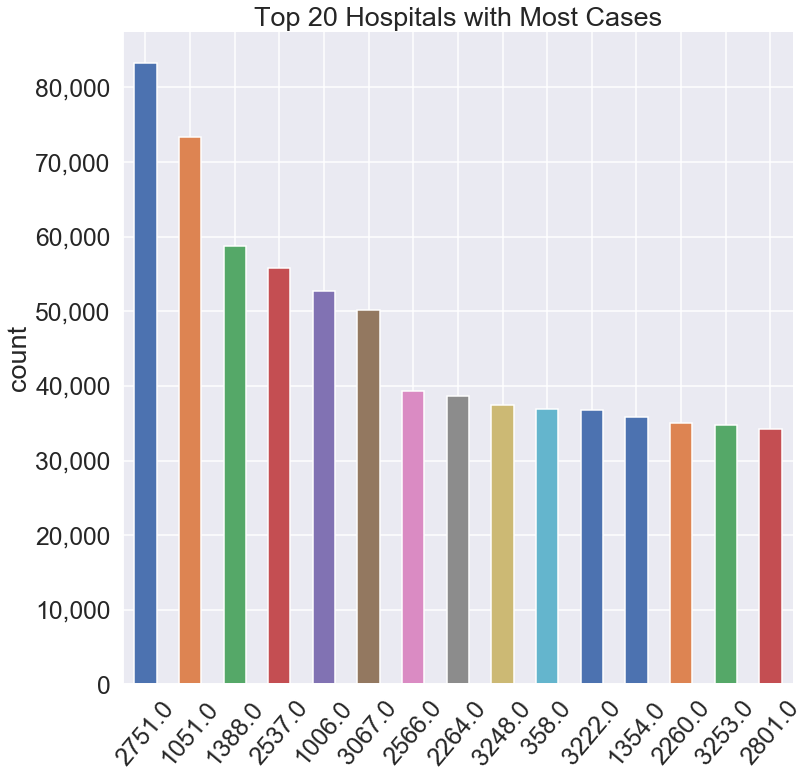

In [38]:
count_plot_slice(df = hospi_data_clean, col_name = 'CGC_HOSP_CAT', head = 15, 
                     title = 'Top 20 Hospitals with Most Cases', xlabel = '', ylabel = 'count')

Text(0.5,0,'Log of Count')

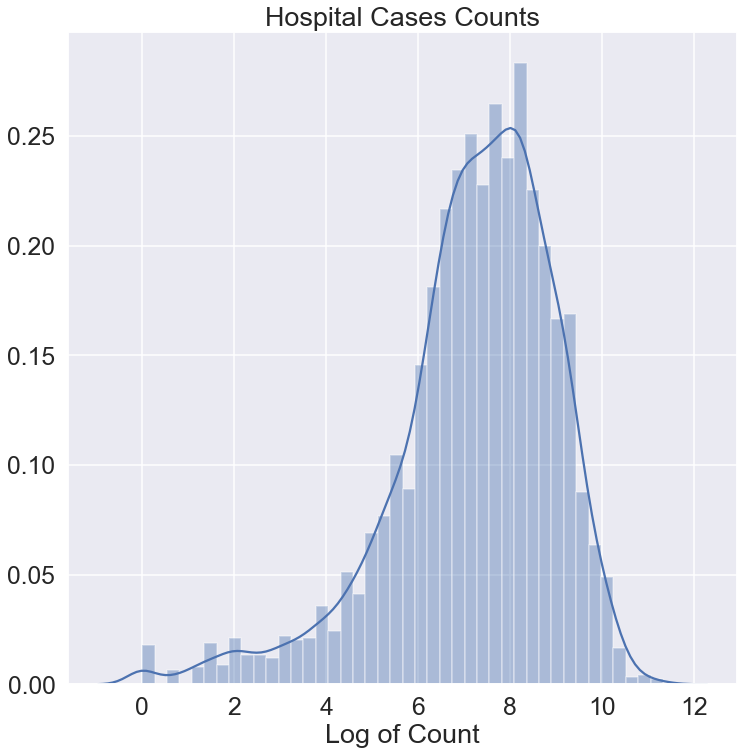

In [39]:
cgc_hosp_count = pd.DataFrame(hospi_data_clean.CGC_HOSP_CAT.value_counts()).reset_index()

sns.distplot(np.log(cgc_hosp_count['CGC_HOSP_CAT']))

plt.title("Hospital Cases Counts")

plt.xlabel('Log of Count')

## *Character of Hospitalization*

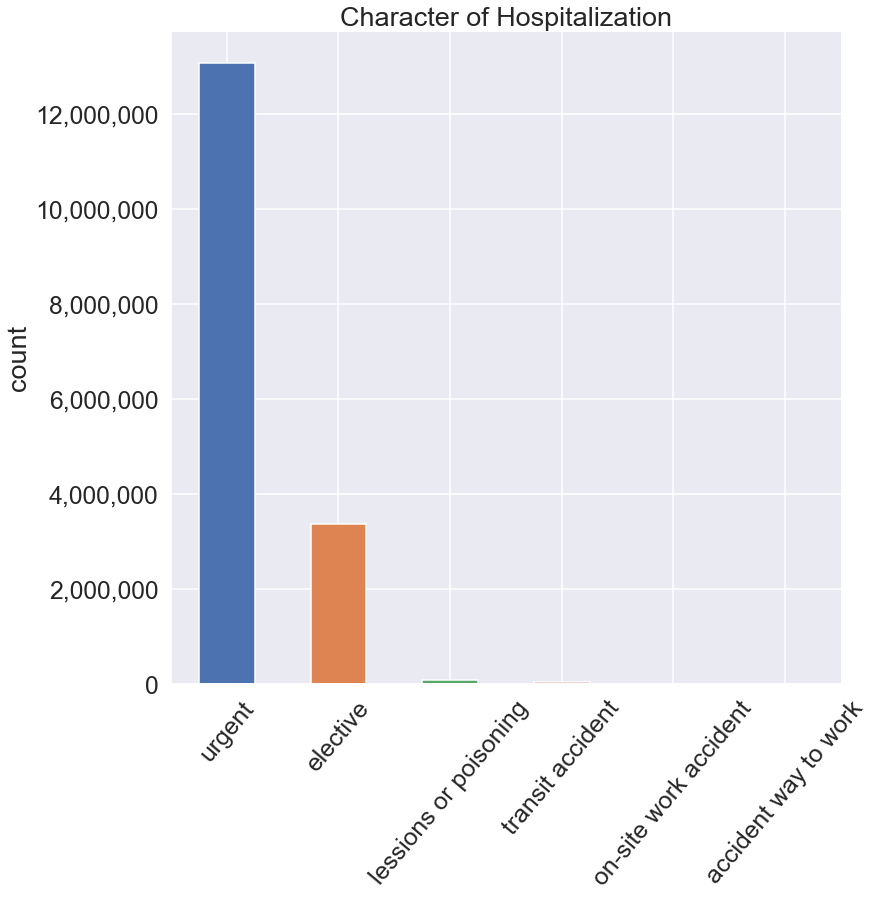

In [40]:
count_plot(df = hospi_data_clean, col_name = 'car_int_name',
           title = 'Character of Hospitalization', xlabel = '', ylabel = 'count')

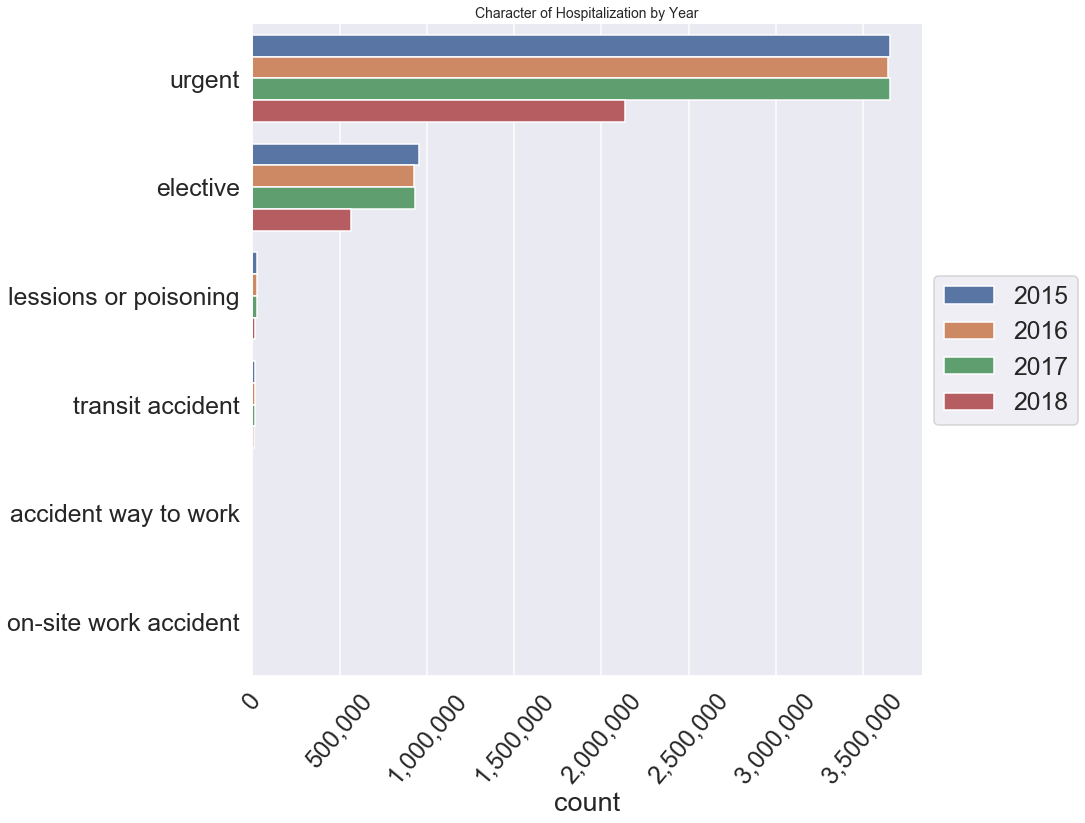

In [41]:
count_plot_hue(df = hospi_data_clean, col_name = 'car_int_name', 
               hue = 'ANO_CMPT',title = 'Character of Hospitalization by Year', 
               ylabel = '', xlabel = 'count')

## *Complexity Level*

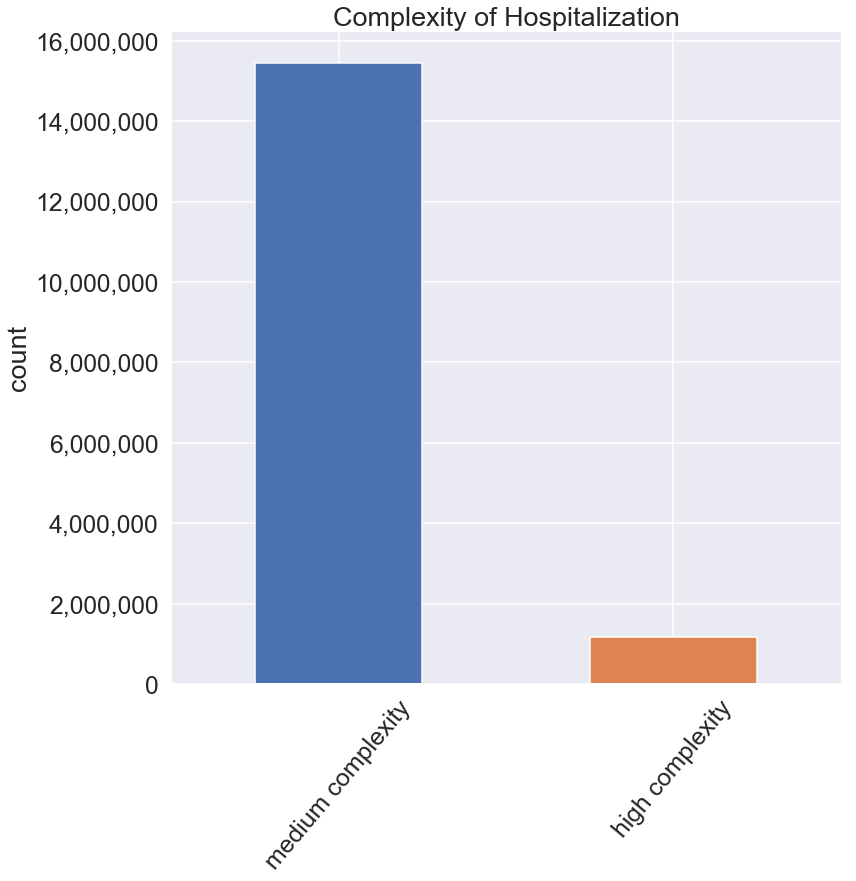

In [42]:
count_plot(df = hospi_data_clean, col_name = 'complex_name',
           title = 'Complexity of Hospitalization', xlabel = '', ylabel = 'count')

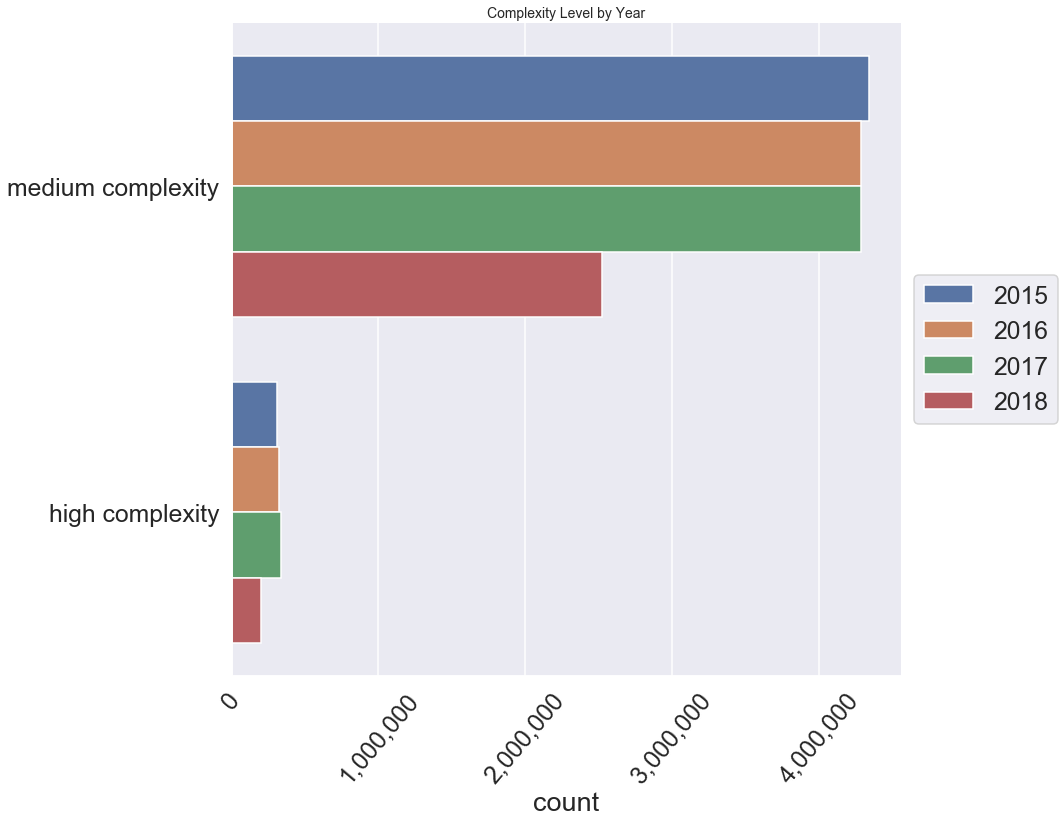

In [43]:
count_plot_hue(df = hospi_data_clean, col_name = 'complex_name', 
               hue = 'ANO_CMPT',title = 'Complexity Level by Year', 
               ylabel = '', xlabel = 'count')

## *Reason for Stay/Exit - Group*

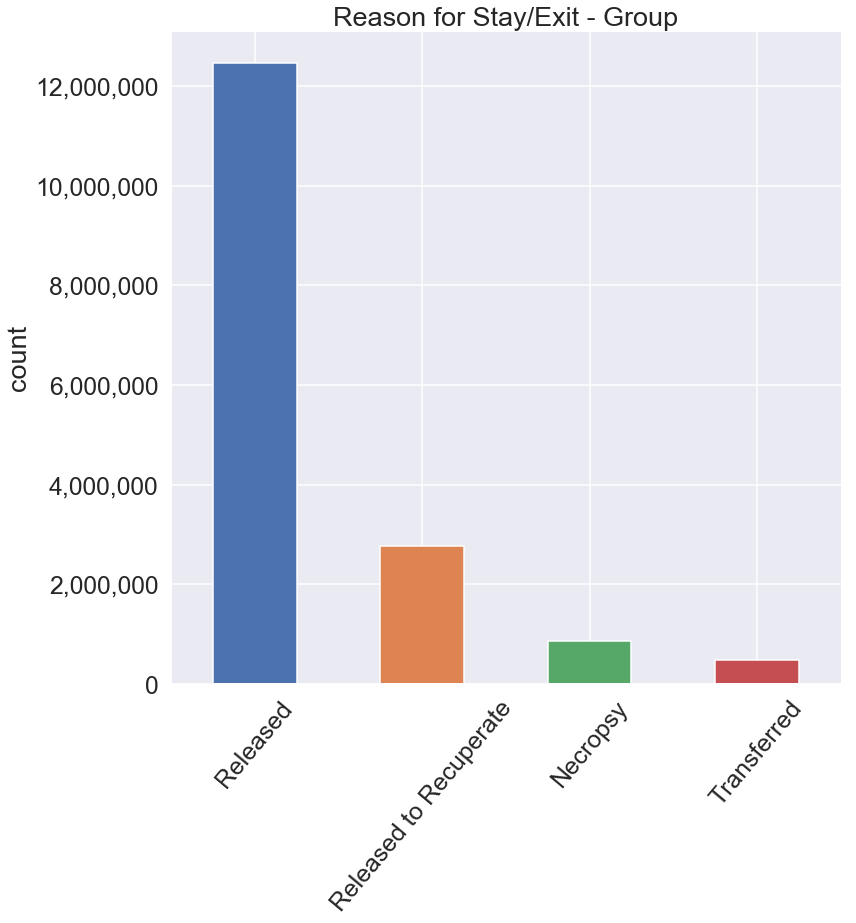

In [44]:
count_plot(df = hospi_data_clean, col_name = 'cobranca_group',
           title = 'Reason for Stay/Exit - Group', xlabel = '', ylabel = 'count')

## *Reason for Stay/Exit*

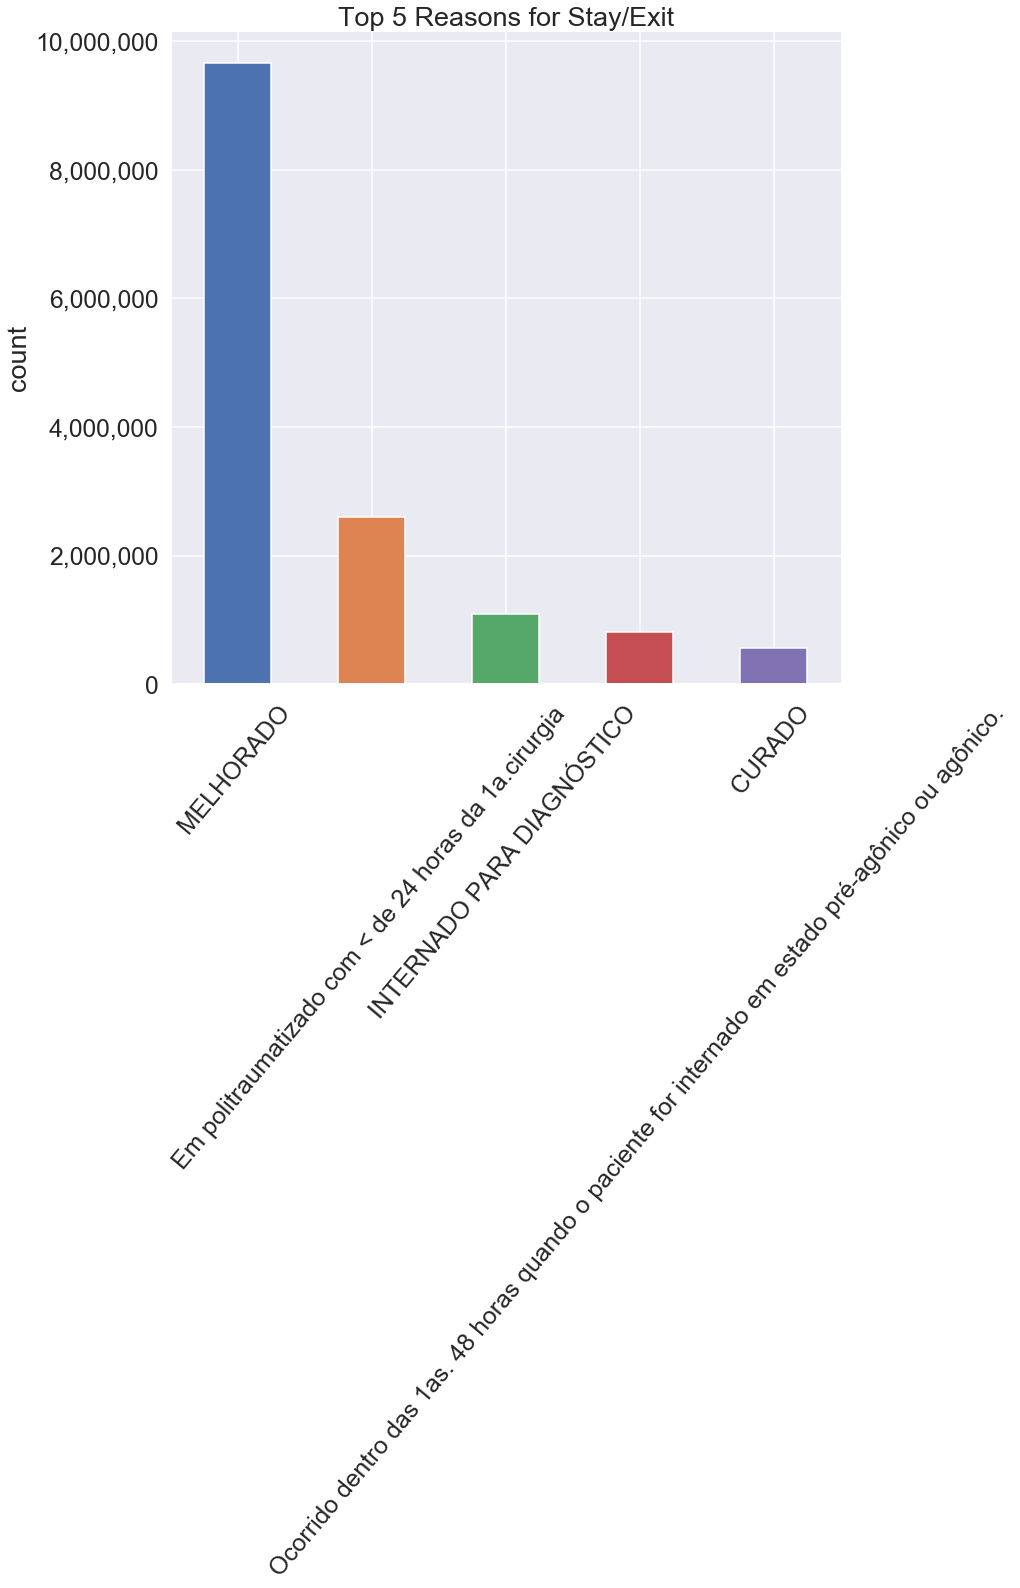

In [45]:
count_plot_slice(df = hospi_data_clean, col_name = 'cobranca_name', head = 5, 
                     title = 'Top 5 Reasons for Stay/Exit', xlabel = '', ylabel = 'count')

In [46]:
pd.DataFrame(hospi_data_clean['cobranca_name'].value_counts())

cobranca_name
MELHORADO                                                 9665636
Em politraumatizado com < de 24 horas da 1a.cir...        2604471
INTERNADO PARA DIAGNÓSTICO                                1095517
Ocorrido dentro das 1as. 48 horas quando o paci...         805235
CURADO                                                     553550
TISIOLOGIA                                                 487374
POR CARACTERÍSTICAS PRÓPRIAS DA DOENÇA                     322336
PARA OUTRA INTERNAÇÃO (OUTRO DIAGNÓSTICO)                  149074
Em politraumatizado 24 a 48 horas após a 1a.cir...         134612
A PEDIDO                                                   121665
POR INTERCORRÊNCIA DO PROCEDIMENTO                         114573
ADMINISTRATIVA                                              79160
EVASÃO                                                      62238
POR MOTIVO SOCIAL                                           54305
POR IMPOSSIBILIDADE DE VIVÊNCIA SÓClO-FAMILIAR              31620
Ocorrido dentro das 1 as 48 horas quando o paci...          29156
Ocorrido a partir de 48 horas após a internação.            25317
Em politraumatizado > de 72 hs. Após a 1a. ciru...          20556
Em politraumatizado 48 a 72 horas após a 1a.cir...           9398
PARA COMPLEMENTAÇÃO                                          5889
POR DOENÇA CRÔNICA                                            544
PSIQUIATRIA                                                   447
Em cirurgia de emergência 24 a 48 horas após a ...            198
Em cirurgia de emergência com menos de 24 da pr...            144
Em cirurgia de emergência 48 a 72 horas após a ...             84

## *Venereal Disease Exam*

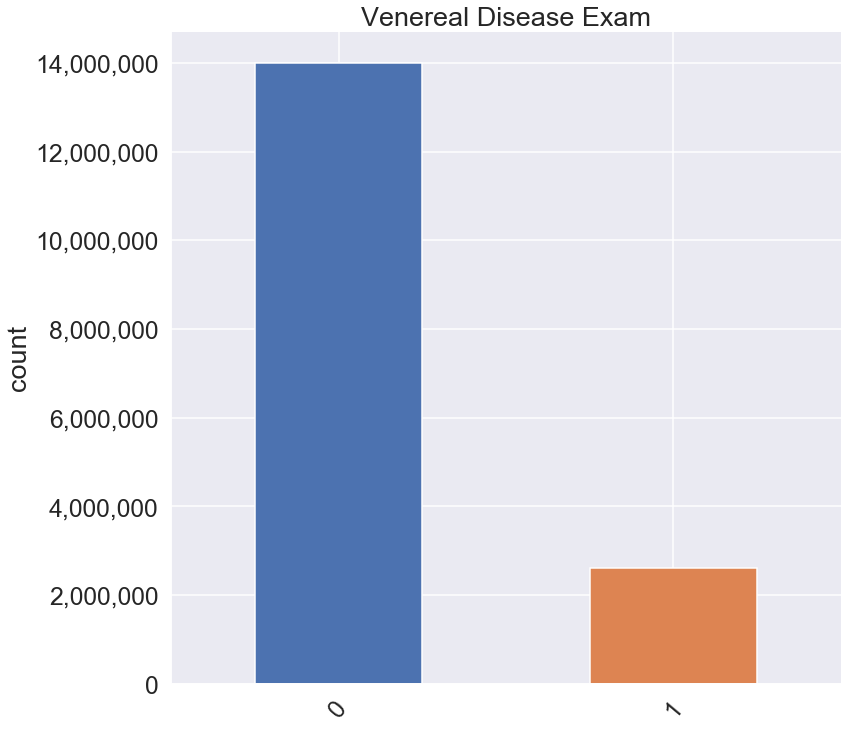

In [47]:
count_plot(df = hospi_data_clean, col_name = 'IND_VDRL_CAT',
           title = 'Venereal Disease Exam', xlabel = '', ylabel = 'count')

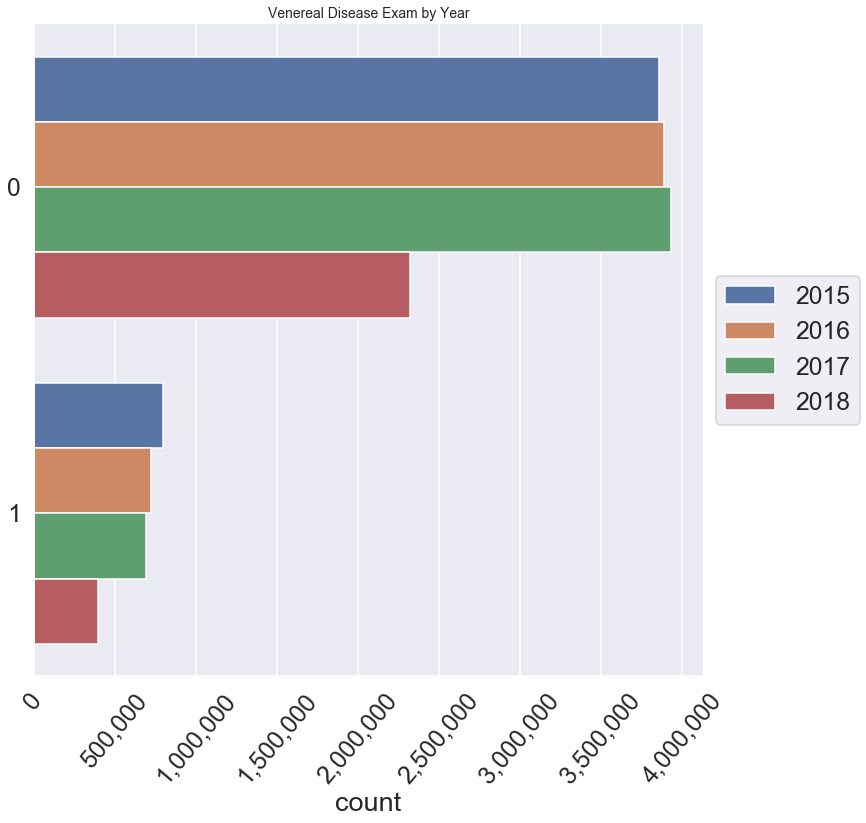

In [48]:
count_plot_hue(df = hospi_data_clean, col_name = 'IND_VDRL_CAT', 
               hue = 'ANO_CMPT',title = 'Venereal Disease Exam by Year', 
               ylabel = '', xlabel = 'count')

# *Contraception Used 1 & 2*

In [49]:
hospi_data_clean.CONTRACEP1_CAT.value_counts()

0     16479054
8        69675
10       47573
12        4595
1         4428
11        4418
6         2659
7          876
9          722
2          284
4          230
5          160
3          156
Name: CONTRACEP1_CAT, dtype: int64

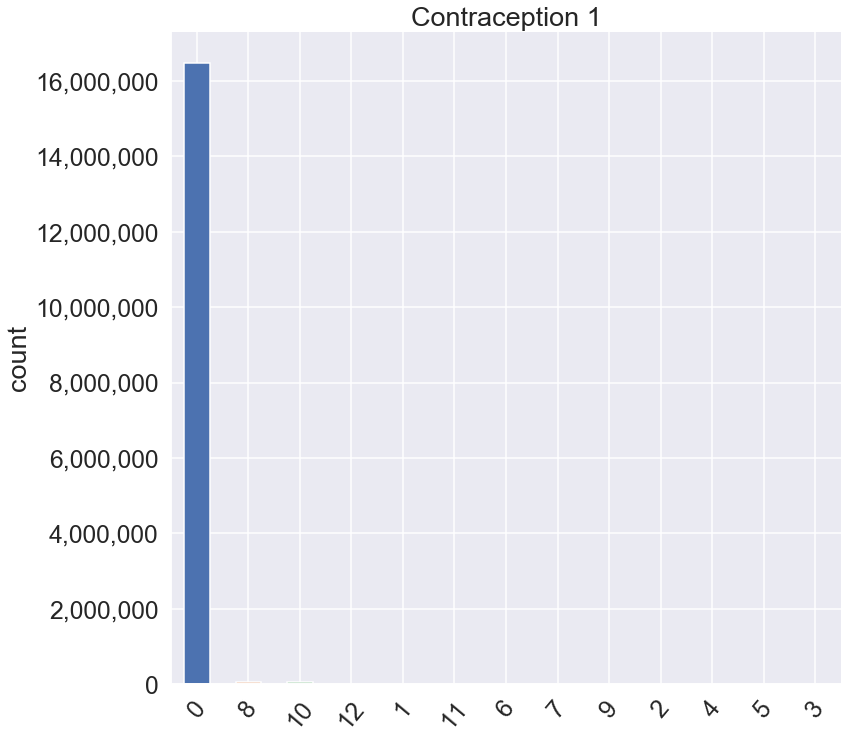

In [50]:
count_plot(df = hospi_data_clean, col_name = 'CONTRACEP1_CAT',
           title = 'Contraception 1', xlabel = '', ylabel = 'count')

In [51]:
hospi_data_clean.CONTRACEP2_CAT.value_counts()

0     16527531
8        35566
10       33594
11        6767
12        4598
1         3781
6         1248
7          556
9          545
2          253
4          197
3          116
5           78
Name: CONTRACEP2_CAT, dtype: int64

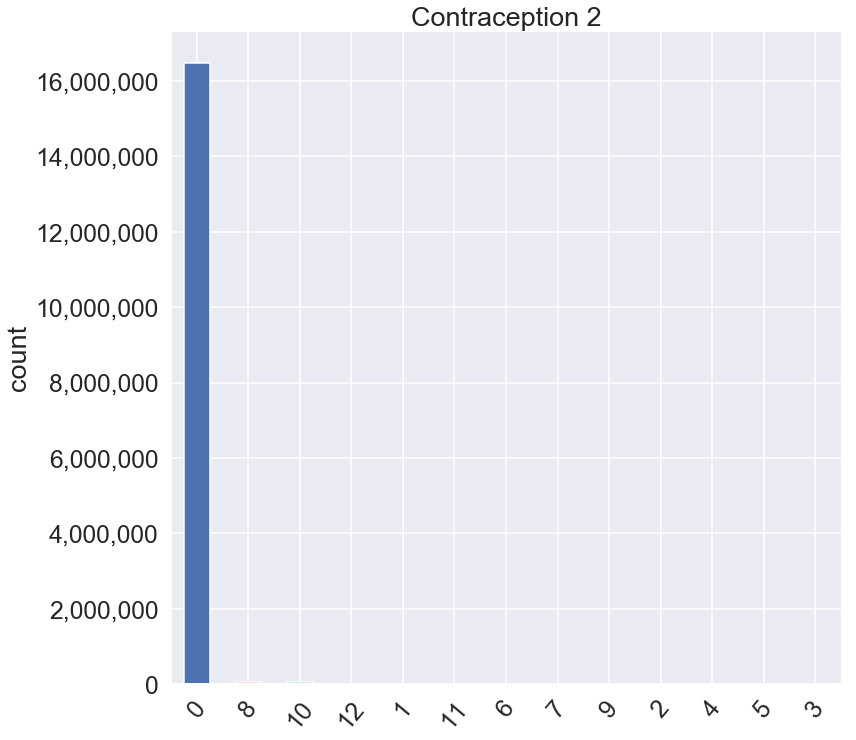

In [52]:
count_plot(df = hospi_data_clean, col_name = 'CONTRACEP1_CAT',
           title = 'Contraception 2', xlabel = '', ylabel = 'count')

## *Days of Stay: Length of Hospitalization, ICU days, Companion Days, Intermediary Unit*

In [53]:
hospi_data_clean[['UTI_MES_TO','MARCA_UTI','UTI_INT_TO','DIAR_ACOM','DIAS_PERM']].describe()

UTI_MES_TO     MARCA_UTI    UTI_INT_TO     DIAR_ACOM     DIAS_PERM
count  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07  1.661483e+07
mean   4.613846e-01  4.841298e+00  4.942368e-02  1.945878e+00  5.392590e+00
std    2.893281e+00  1.863319e+01  9.259680e-01  4.384568e+00  8.022709e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  6.000000e+00
max    3.020000e+02  9.900000e+01  2.280000e+02  3.400000e+02  3.640000e+02

In [54]:
min_max_scaler = preprocessing.MinMaxScaler()
days_scaled = min_max_scaler.fit_transform(hospi_data_clean[['DIAS_PERM']])
df_days_norm = pd.DataFrame(days_scaled)

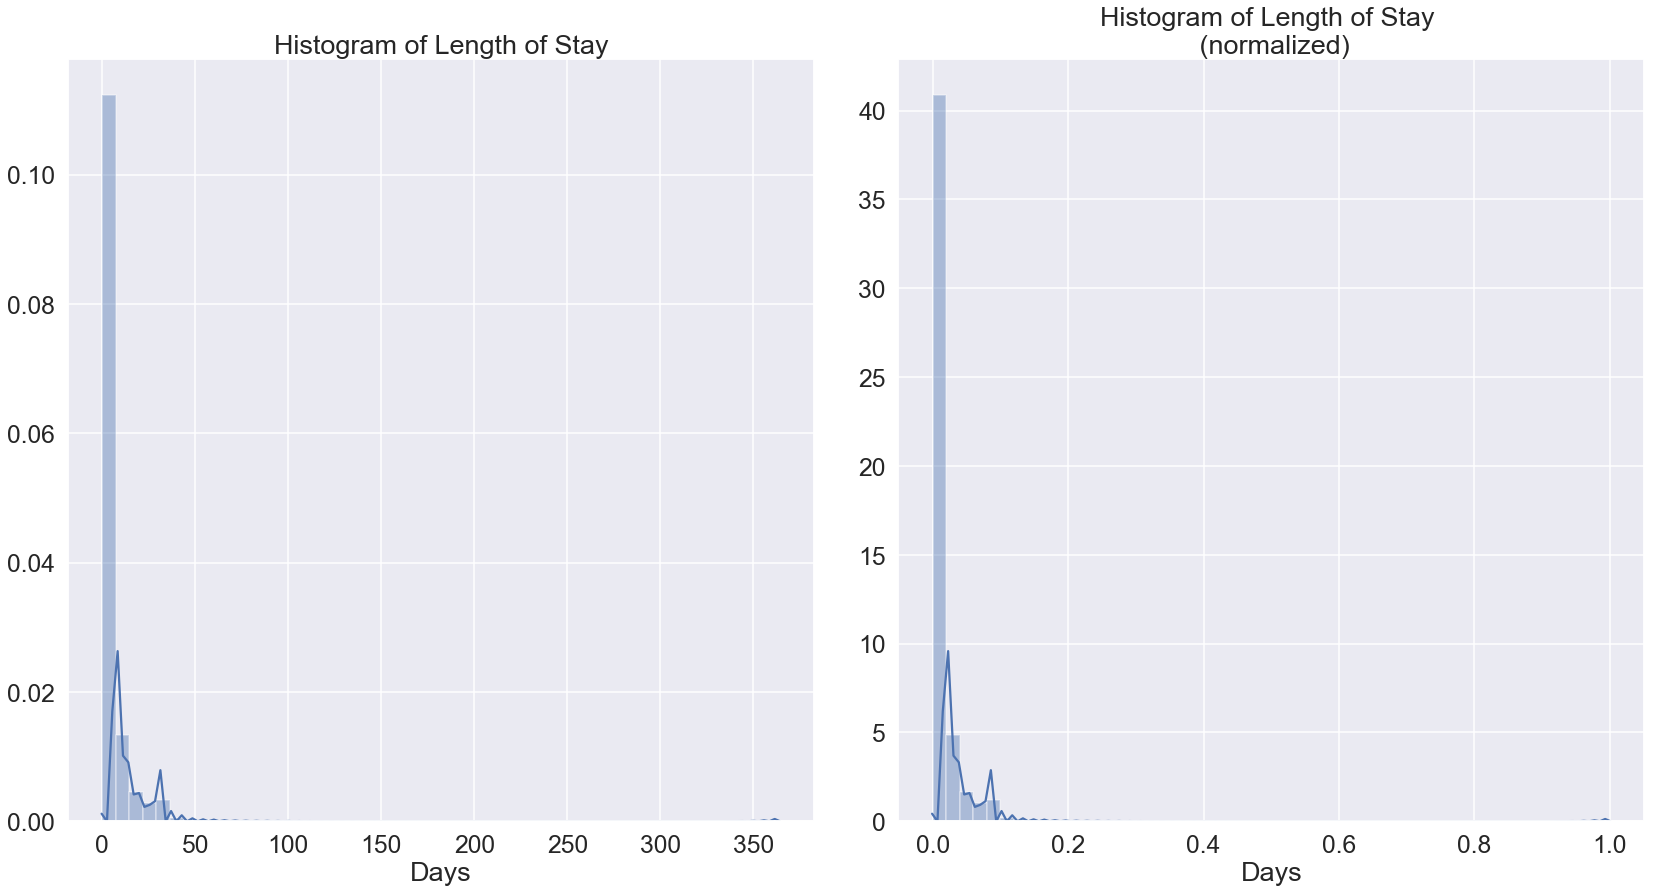

In [55]:
# Plot age variable - - All Years/Total

plt.subplot(221)

sns.distplot(hospi_data_clean['DIAS_PERM'])

plt.title('Histogram of Length of Stay')

plt.xlabel('Days')

plt.subplot(222)

sns.distplot(df_days_norm)

plt.title("Histogram of Length of Stay \n (normalized)")

plt.xlabel('Days')

plt.tight_layout(rect=[2, 2, 4, 4])

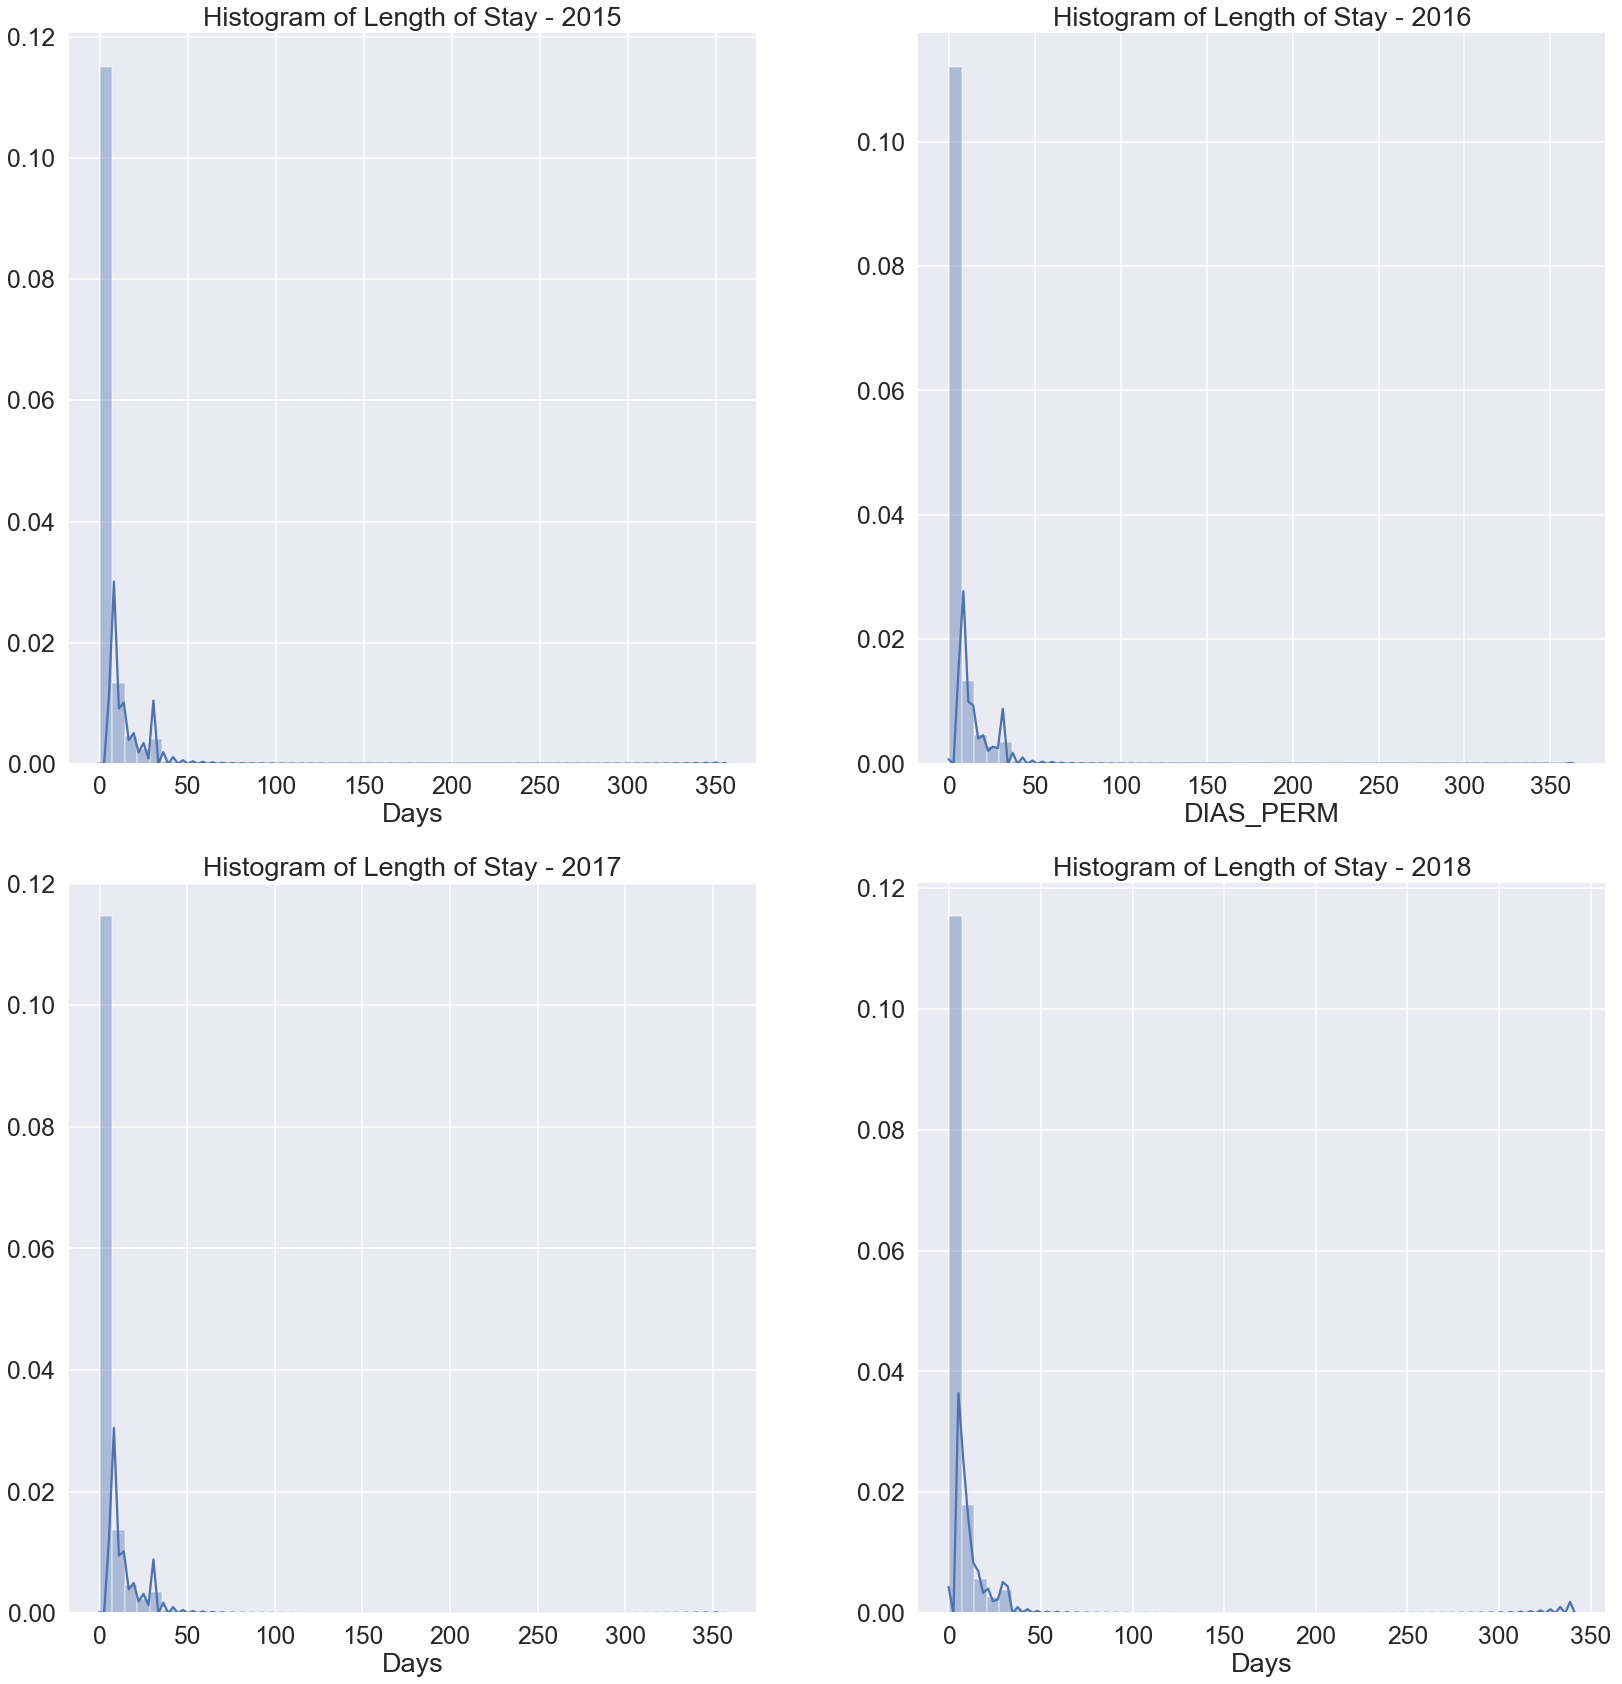

In [56]:
plt.subplot(221)

sns.distplot(hospi_2015['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2015")

plt.xlabel('Days')

plt.subplot(222)

sns.distplot(hospi_2016['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2016")

plt.subplot(223)

sns.distplot(hospi_2017['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2017")

plt.xlabel('Days')

plt.subplot(224)

sns.distplot(hospi_2018['DIAS_PERM'])

plt.title("Histogram of Length of Stay - 2018")

plt.xlabel('Days')

plt.tight_layout(rect=[2, 2, 4, 4])

In [57]:
# Normality Tests

norm_dist_tests(df = hospi_data_clean, col_name = 'DIAS_PERM')

D’Agostino and Pearson’s:  NormaltestResult(statistic=17053863.32528353, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=2189076.6247634925, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=16614830, minmax=(0, 364), mean=5.392589511899911, variance=64.36386134284399, skewness=4.815603942567032, kurtosis=59.59394706054896)


In [58]:
# ECDF

x, y = ecdf(hospi_data_clean['DIAS_PERM'])

x_theor, y_theor = theor_ecdf(df = hospi_data_clean, col_name = 'DIAS_PERM', seed = 42)

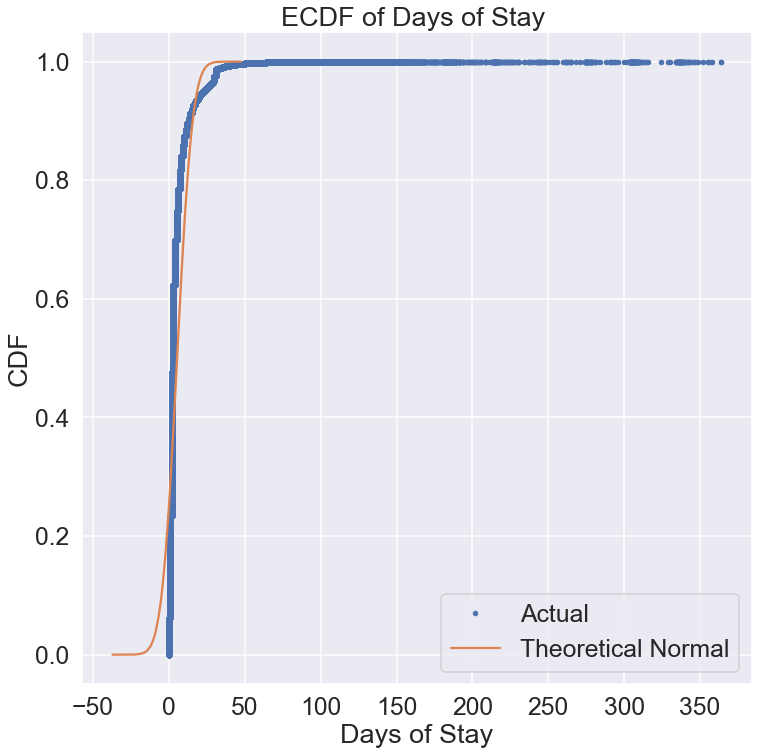

In [59]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF of Days of Stay ")

plt.xlabel("Days of Stay")

plt.ylabel('CDF')

plt.show()

In [60]:
# Replicates

%time

n_tries = 10

days_cat_mean_replicates = bs_sample(hospi_data_clean['DIAS_PERM'], np.mean, size = n_tries)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 11 µs


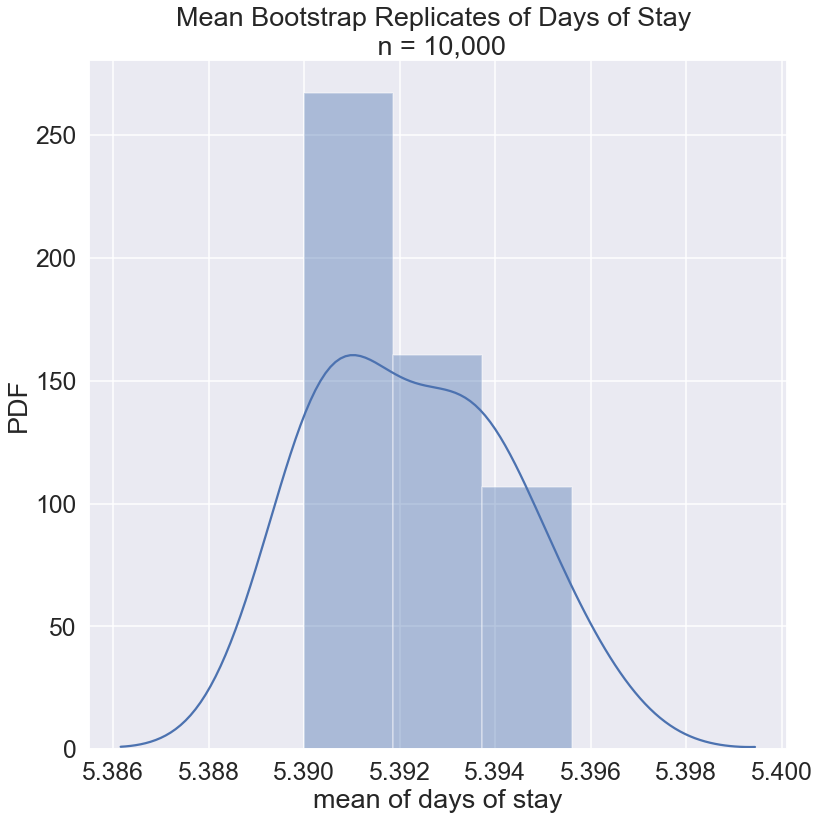

In [61]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(days_cat_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean of days of stay')

plt.title("Mean Bootstrap Replicates of Days of Stay \n n = 10,000")

plt.tight_layout()

In [62]:
days_cat_count_mean = np.mean(hospi_data_clean['DIAS_PERM'])

In [63]:
boot_conf_int(ci = [2.5,97.5], mean_rep = days_cat_mean_replicates, 
              mean = days_cat_count_mean)

Bootstrap Mean Replicates 95% CI:  [5.39002549 5.39527916]
P-value of patient age mean replicates:  0.0005


In [64]:
# One-sided t-test

stats.ttest_1samp(hospi_data_clean['DIAS_PERM'], days_cat_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## *Procedures Performed*

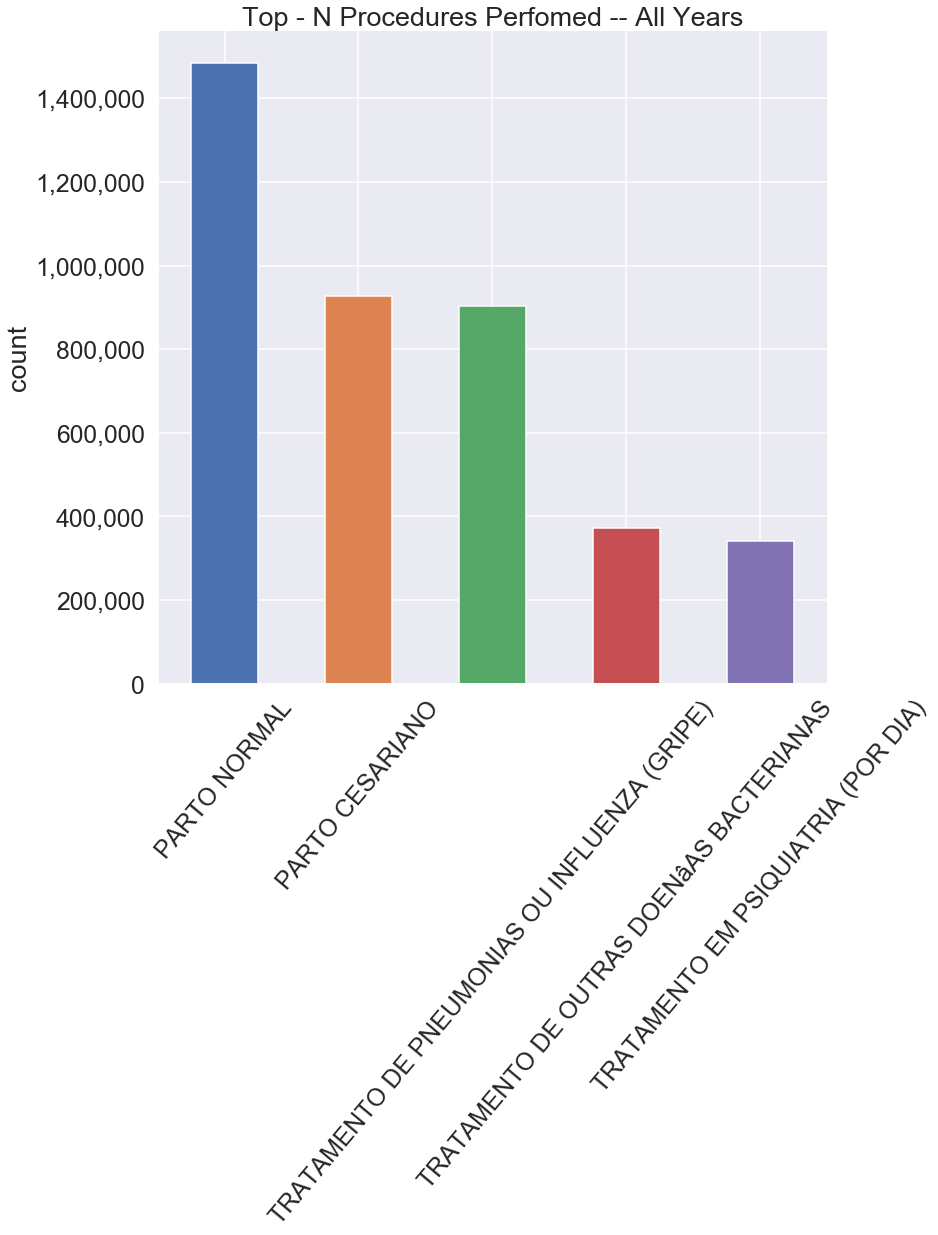

In [65]:
#Top Procedures Performed

count_plot_slice(df = hospi_data_clean, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- All Years', xlabel = '', ylabel = 'count')

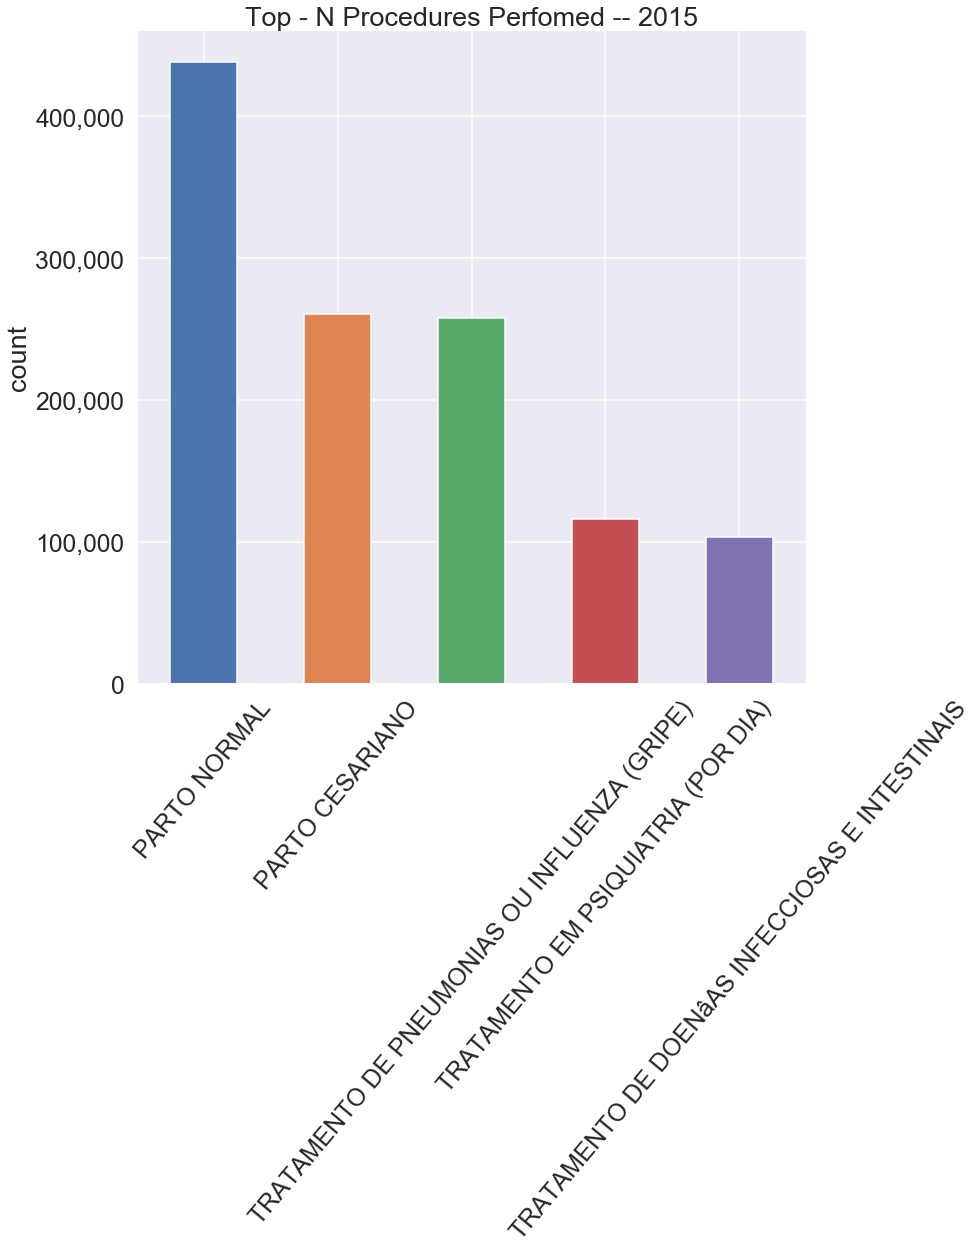

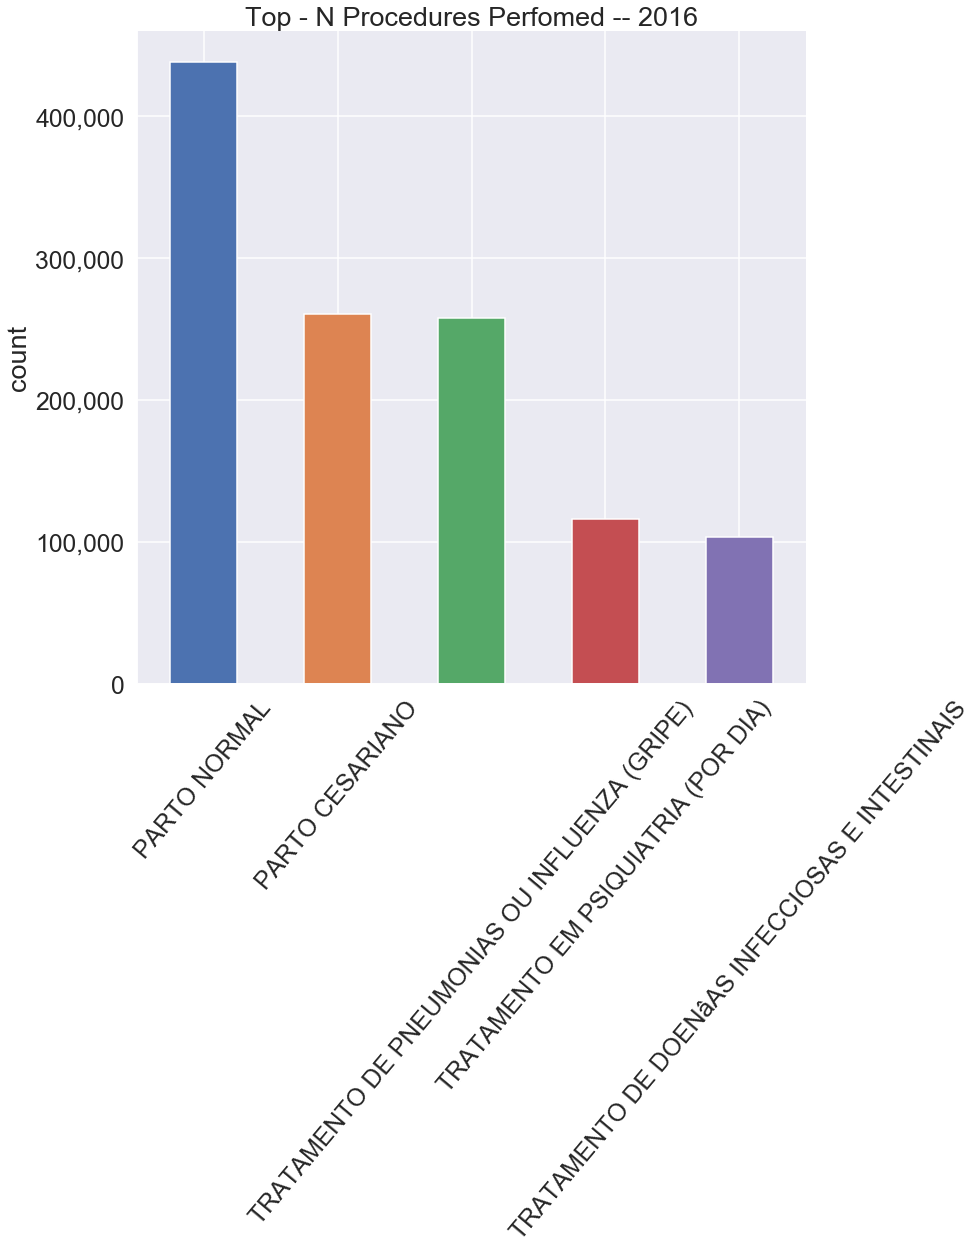

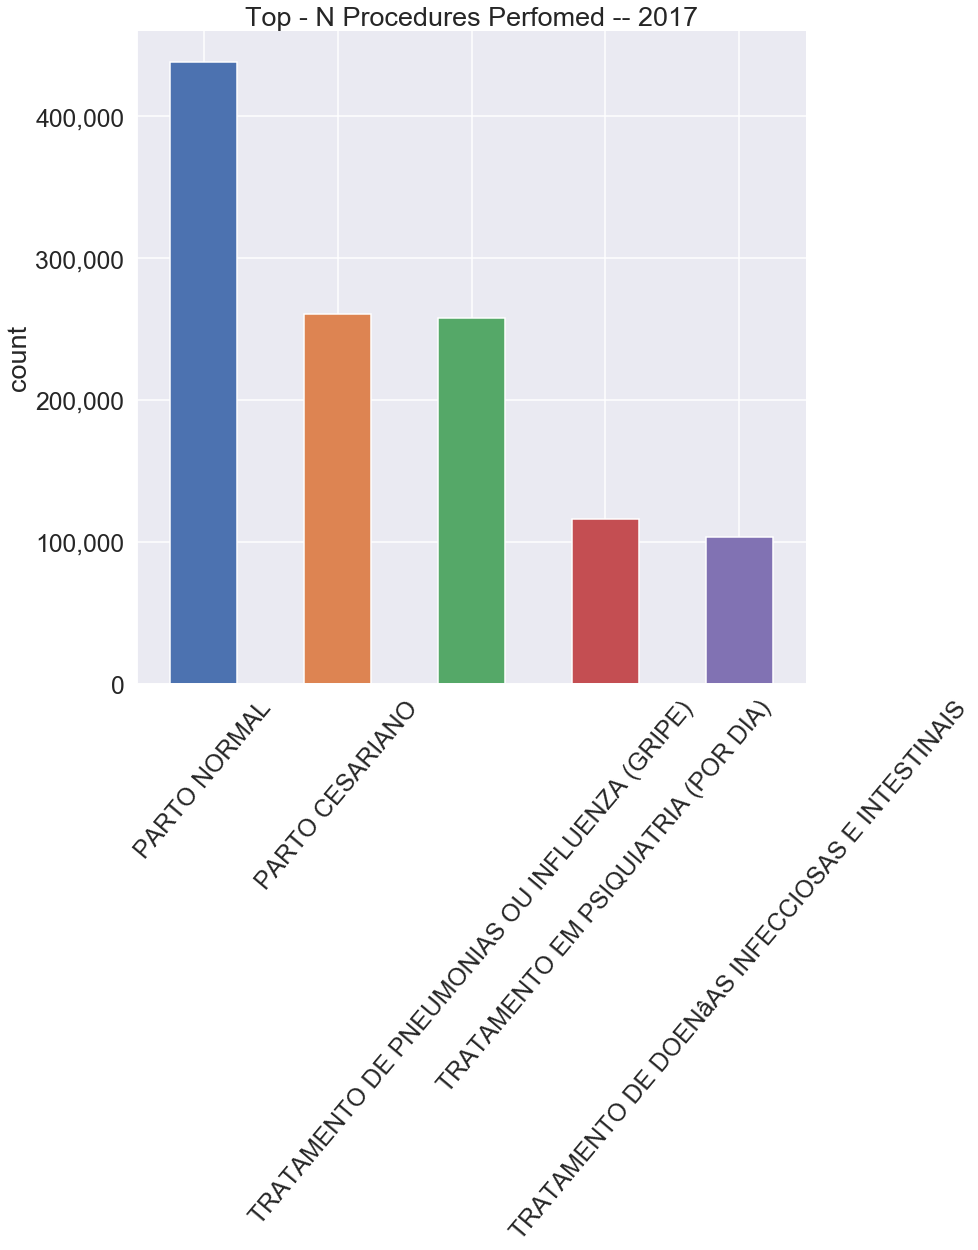

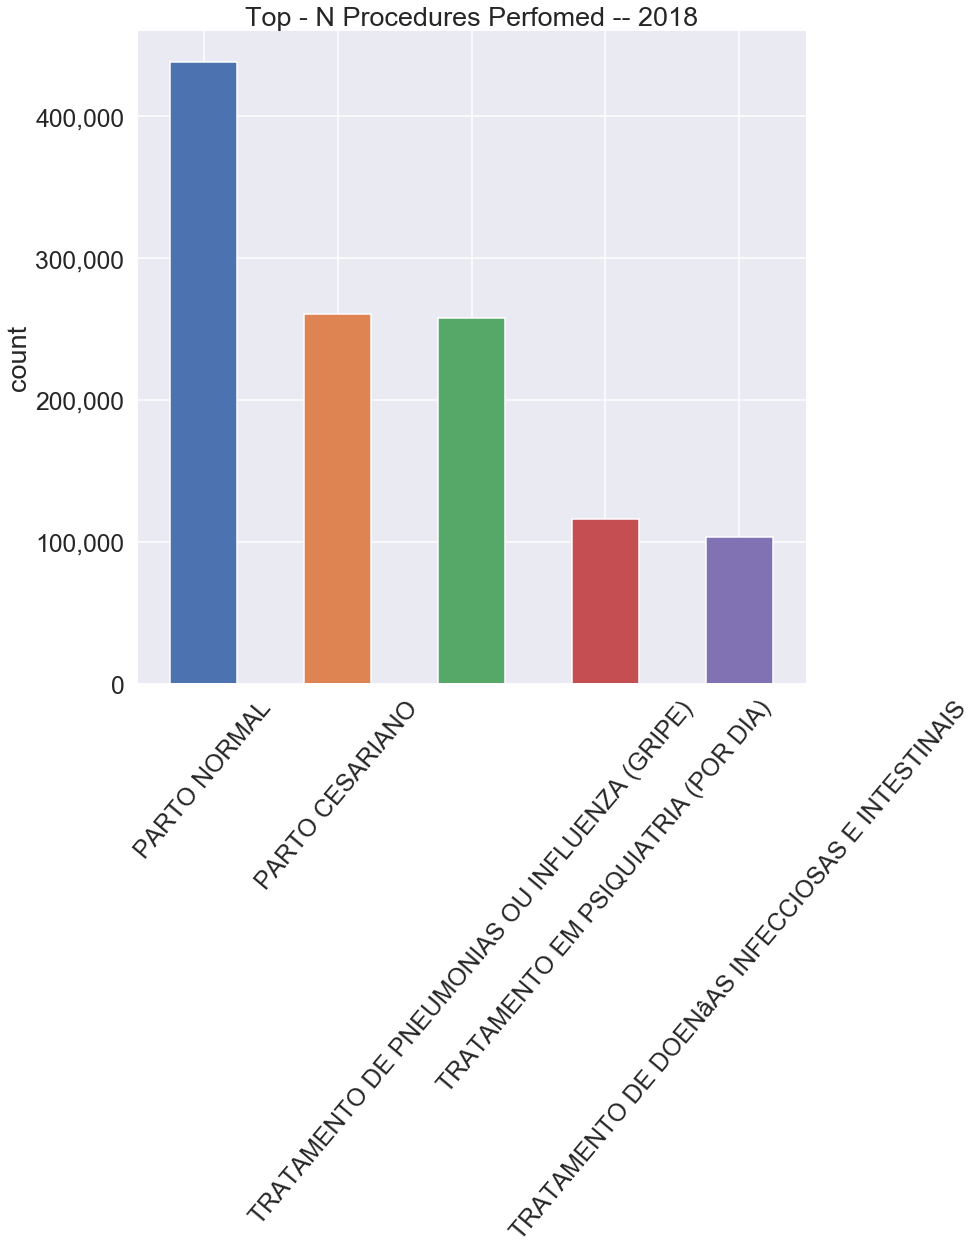

In [66]:
# Top procedures performed by year

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_name', head = 5, 
                 title = 'Top - N Procedures Perfomed -- 2018', xlabel = '', ylabel = 'count')

In [67]:
# Create counts of principal diagnosis and plot distribution

proc_count = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2015 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2016 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2017 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

proc_count_2018 = pd.DataFrame(hospi_data_clean.proc_name.value_counts()).reset_index()

Text(0.5,0,'Log of Count')

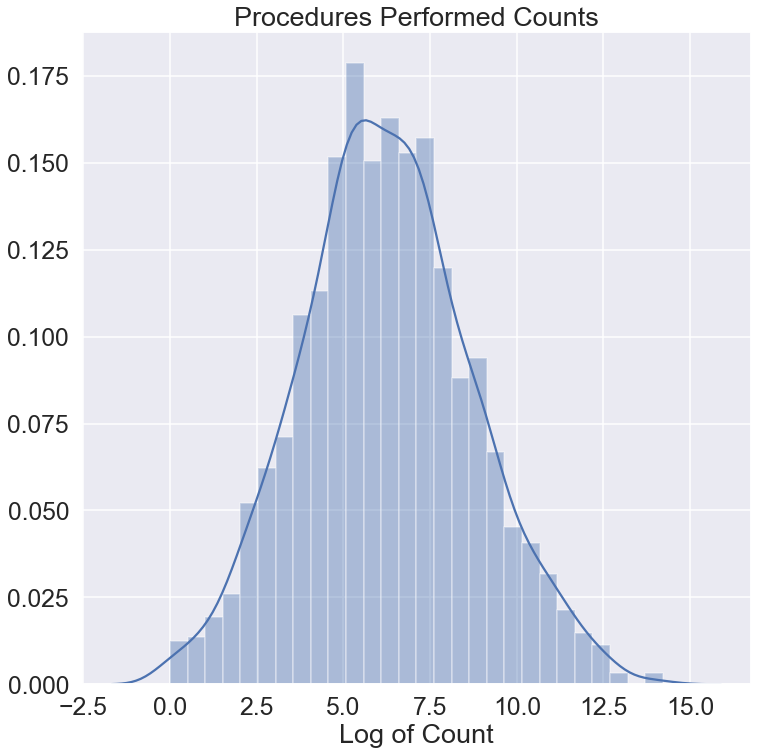

In [68]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(proc_count['proc_name']))

plt.title("Procedures Performed Counts")

plt.xlabel('Log of Count')

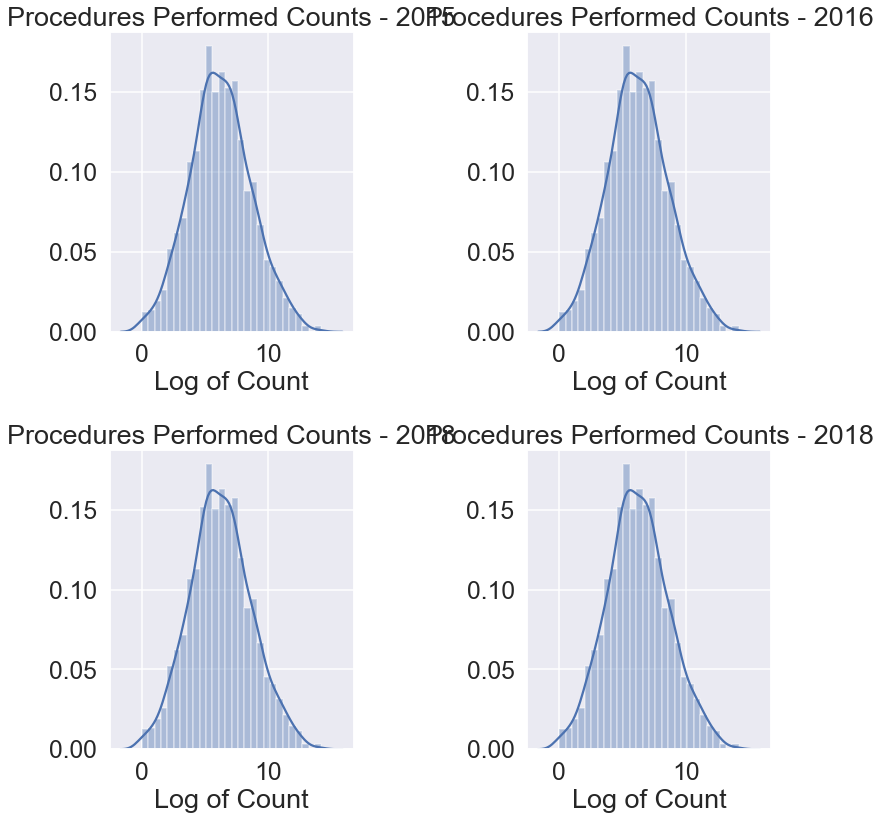

In [69]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(proc_count_2015['proc_name']))

plt.title("Procedures Performed Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(proc_count_2016['proc_name']))

plt.title("Procedures Performed Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(proc_count_2017['proc_name']))

plt.title("Procedures Performed Counts - 2018")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(proc_count_2018['proc_name']))

plt.title("Procedures Performed Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout()

In [70]:
# Normality Tests

norm_dist_tests(df = proc_count, col_name = 'proc_name')

D’Agostino and Pearson’s:  NormaltestResult(statistic=3591.569150252355, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=510.63637388901225, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=1742, minmax=(1, 1485392), mean=9537.789896670494, variance=3100616583.622689, skewness=16.78001623171556, kurtosis=366.7628859790423)


In [71]:
# ECDF

x, y = ecdf(proc_count['proc_name'])

x_theor, y_theor = theor_ecdf(df = proc_count, col_name = 'proc_name', seed = 42)

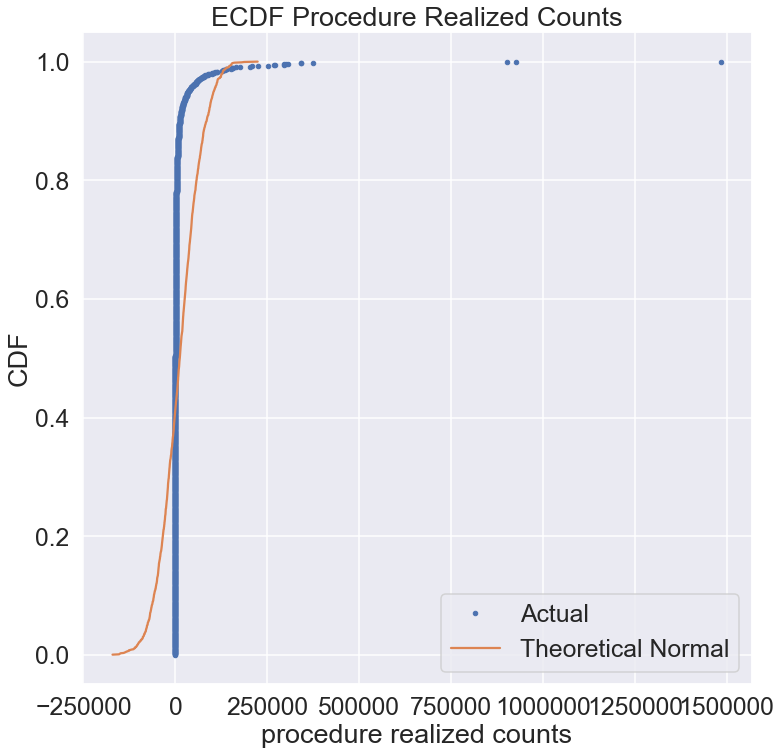

In [72]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Procedure Realized Counts")

plt.xlabel("procedure realized counts")

plt.ylabel('CDF')

plt.show()

In [73]:
# Replicates

%time

n_tries = 10000

proc_mean_replicates = bs_sample(proc_count['proc_name'], np.mean, size = n_tries)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


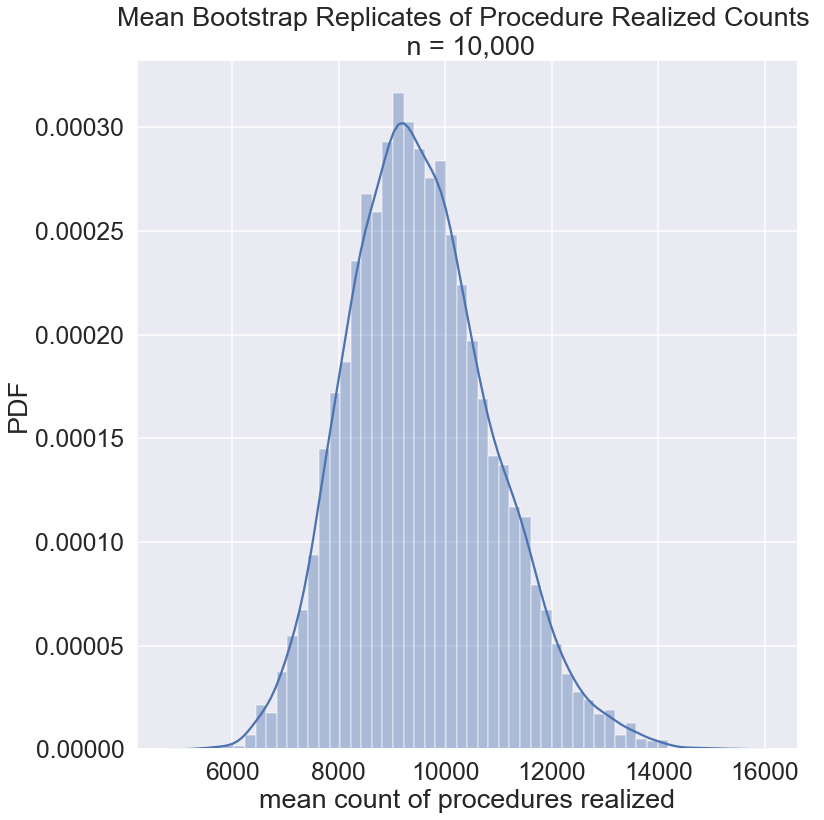

In [74]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(proc_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of procedures realized')

plt.title("Mean Bootstrap Replicates of Procedure Realized Counts \n n = 10,000")

plt.tight_layout()

In [75]:
proc_count_mean = np.mean(proc_count['proc_name'])

In [76]:
boot_conf_int(ci = [2.5,97.5], mean_rep = proc_mean_replicates, 
              mean = proc_count_mean)

Bootstrap Mean Replicates 95% CI:  [ 7183.50477899 12393.44959816]
P-value of patient age mean replicates:  0.5293


In [77]:
# One-sided t-test

stats.ttest_1samp(proc_count['proc_name'], proc_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

## *Procedures Performed Group*

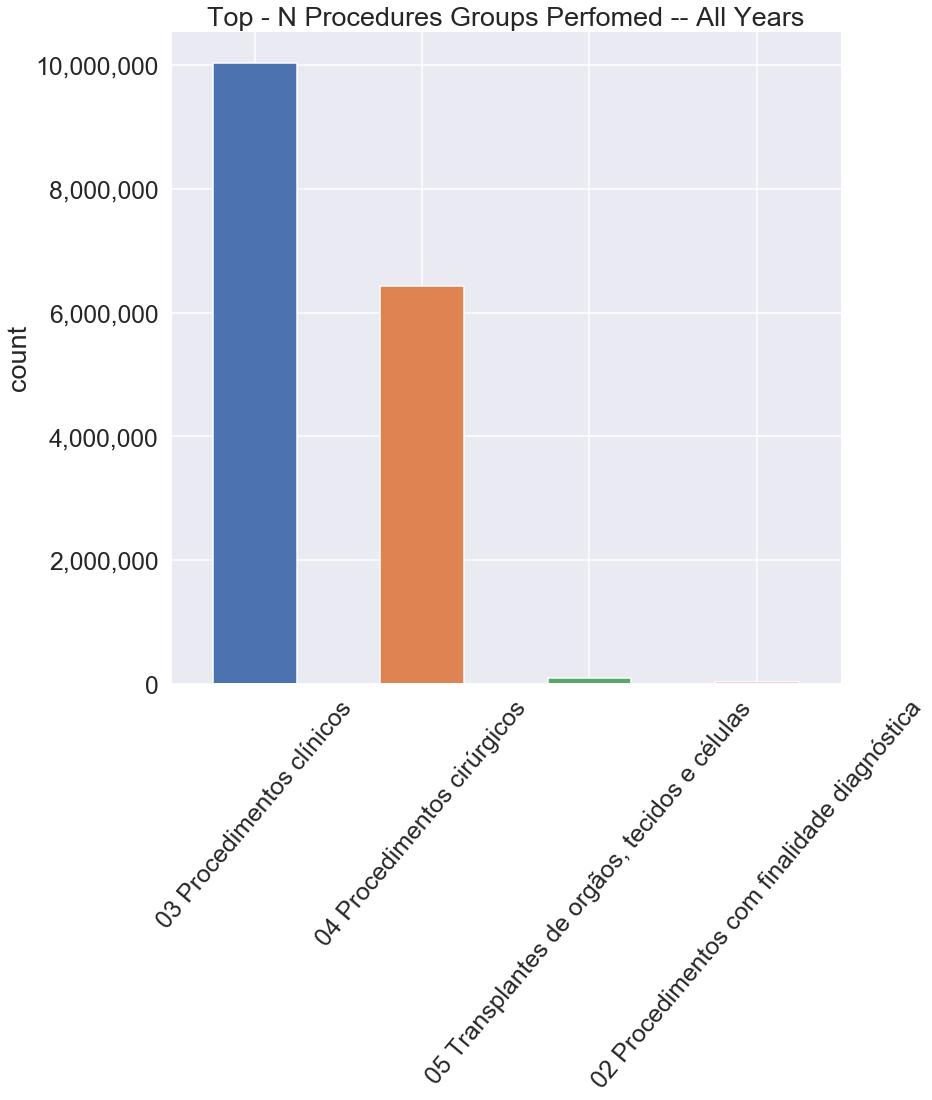

In [78]:
#Top Procedures Performed

count_plot_slice(df = hospi_data_clean, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- All Years', xlabel = '', ylabel = 'count')

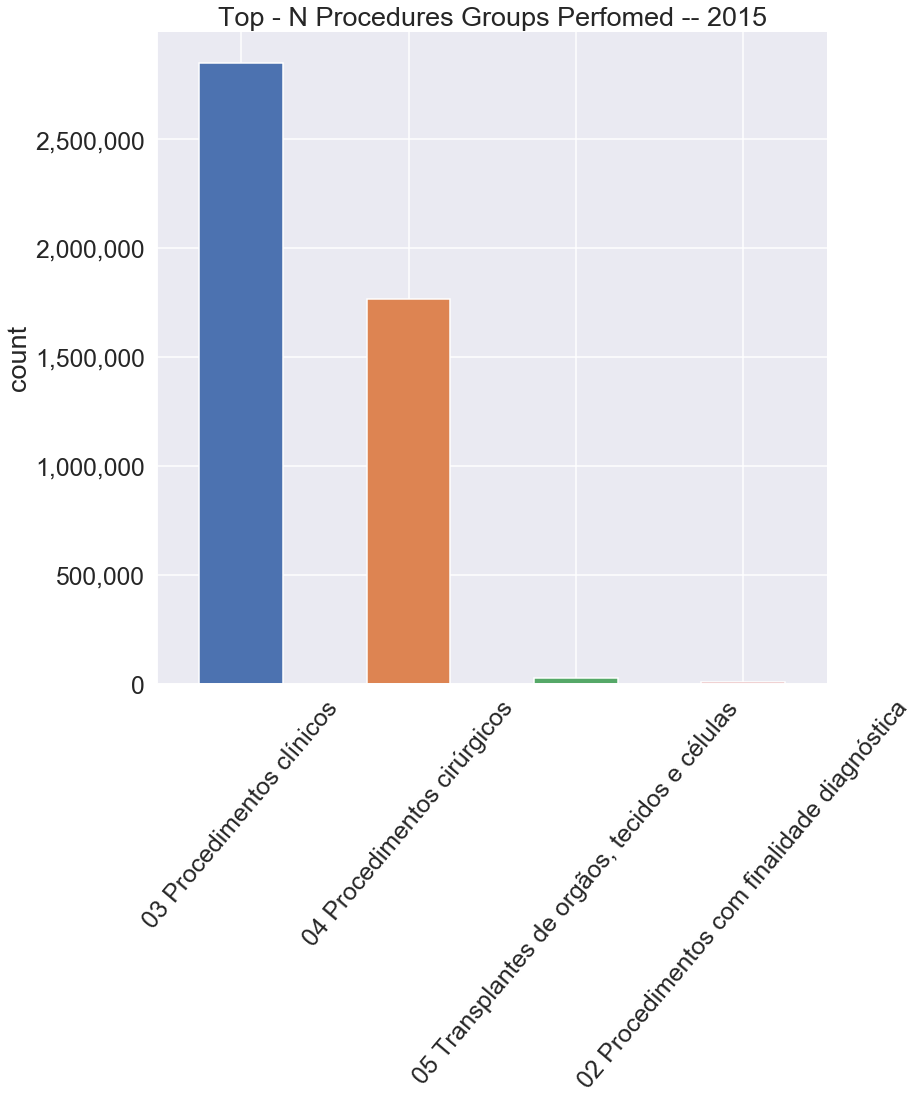

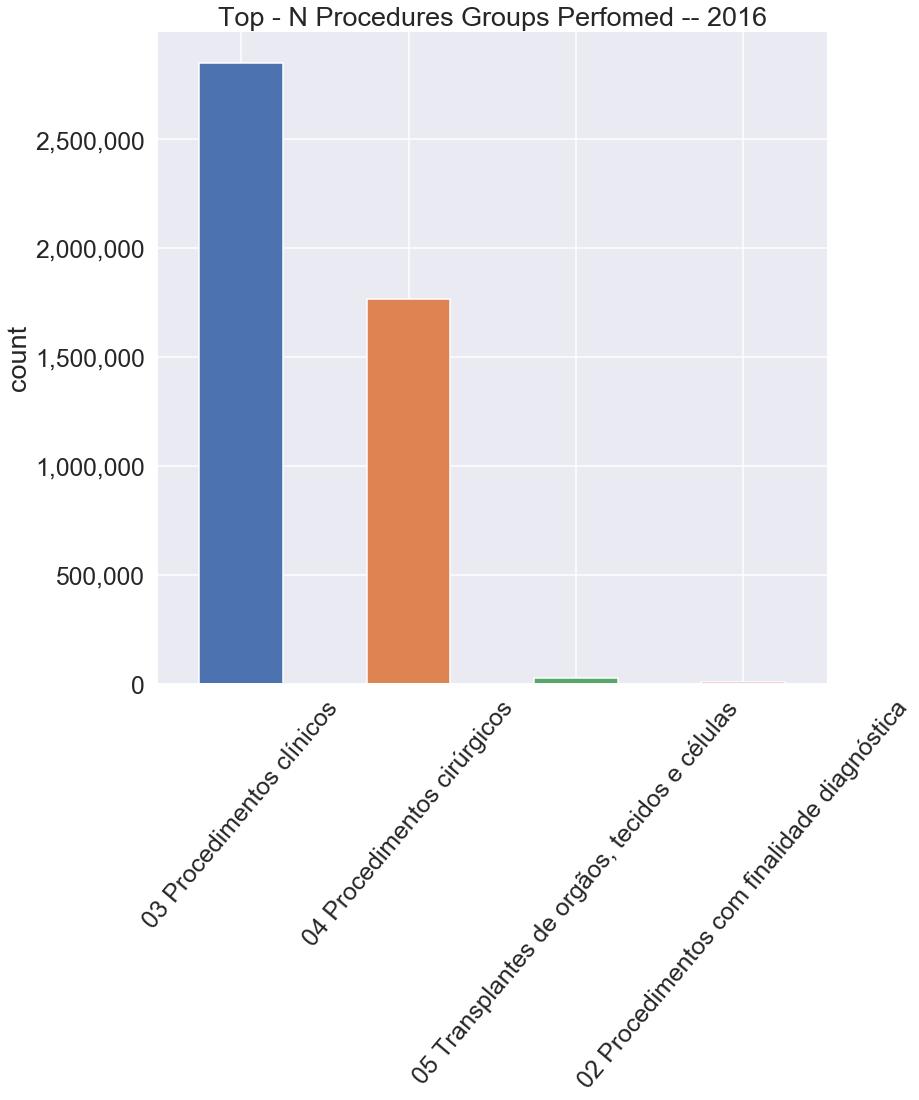

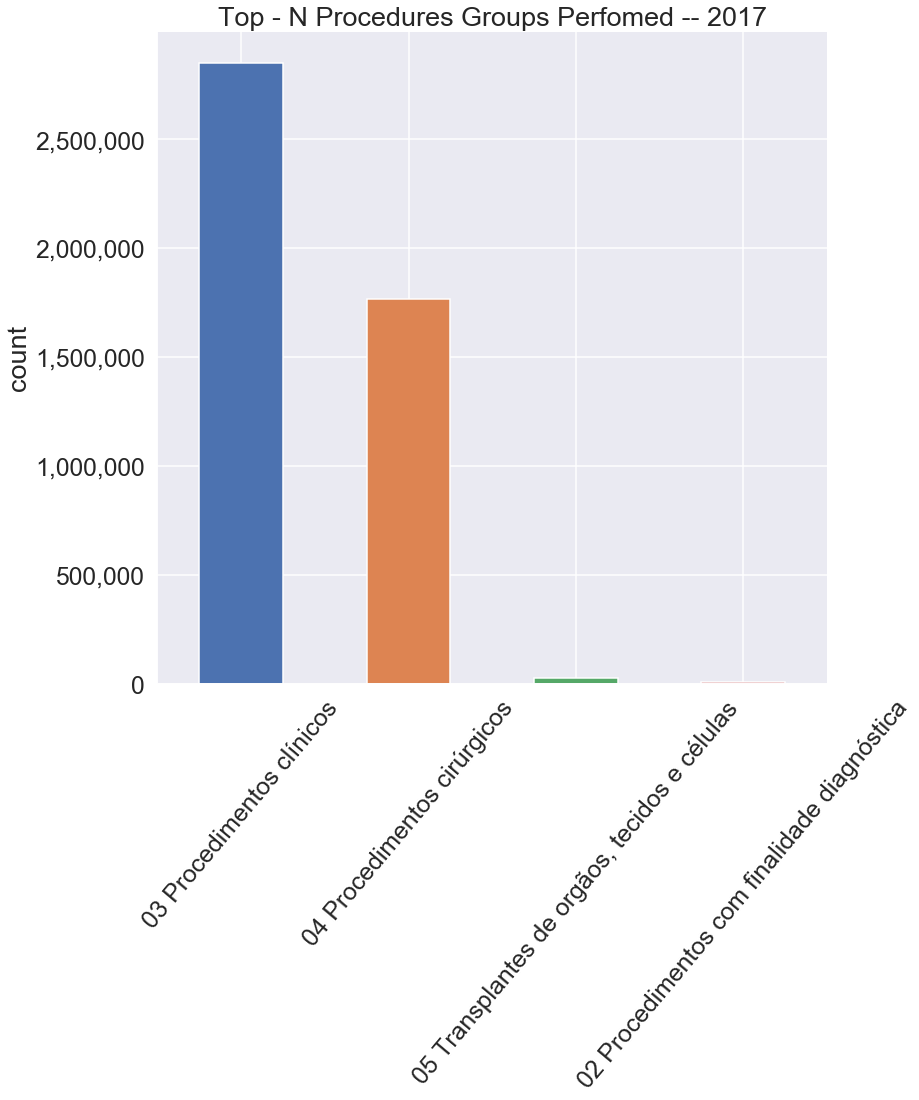

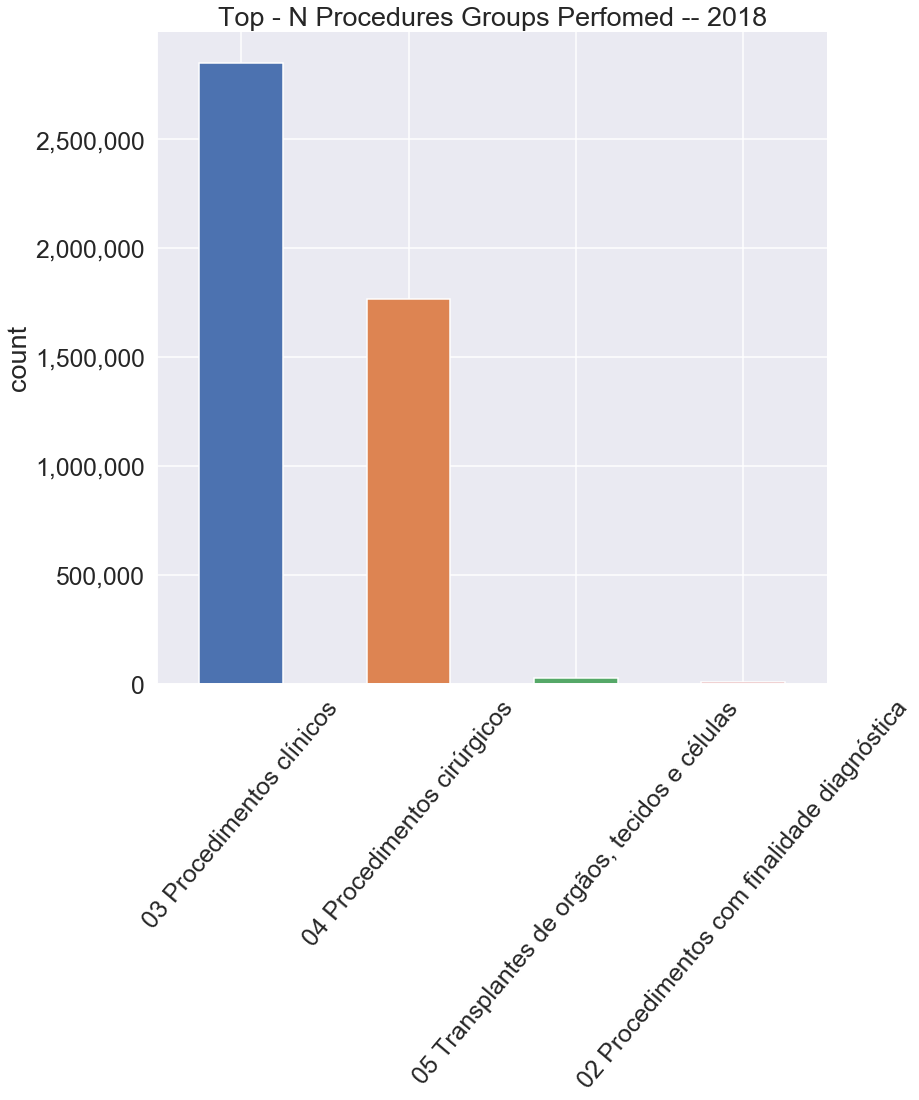

In [79]:
# Top procedures performed by year

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = hospi_2015, col_name = 'proc_group', head = 5, 
                 title = 'Top - N Procedures Groups Perfomed -- 2018', xlabel = '', ylabel = 'count')

## Correlations

**Correlations within Hospitalization Data**

In [80]:
hospi_data_corr = hospi_data_clean.corr()

Text(0.5,1,'Heat Map of Hospitalization Characteristics')

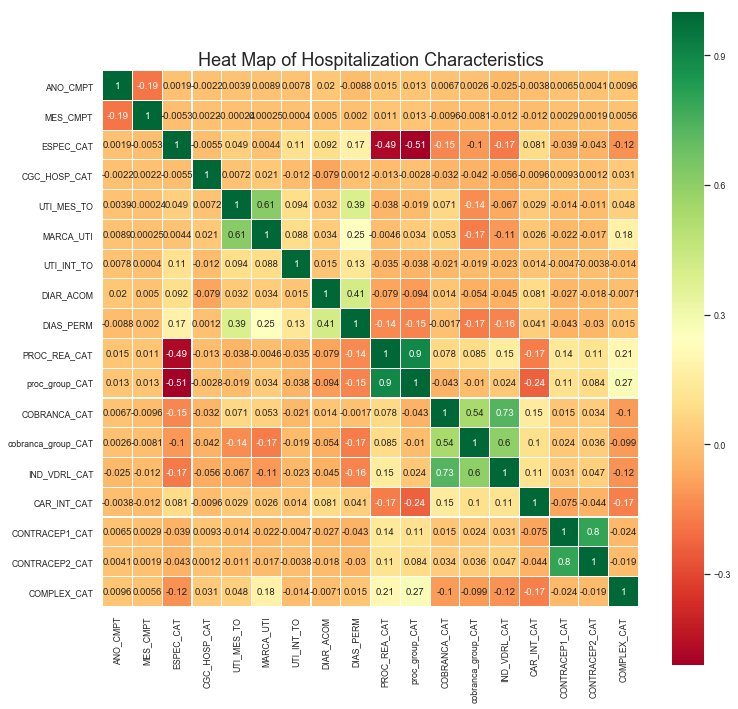

In [81]:
sns.set(font_scale=.8)

sns.heatmap(hospi_data_corr, square=True, linewidths=.05, annot=True, cmap='RdYlGn')

plt.title('Heat Map of Hospitalization Characteristics', fontsize = 18)

**Correlations between Hospitalization Data, Demographics and Diagnosis**

In [82]:
#Load Cleaned Demographics

demo_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/AIH_sample_demo.csv')

demo = pd.read_csv(demo_path, 
                   encoding = 'UTF-8', 
                   na_values= ['NaN',' ',''])

In [83]:
#Load Cleaned Diagnosis

diag_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/AIH_sample_diag.csv')

diag = pd.read_csv(diag_path, 
                   encoding = 'UTF-8', 
                   na_values= ['NaN',' ',''])

In [87]:
#Concatenate with Cleaned Hospital Data 

hospi_demo = hospi_data_clean.join(demo, lsuffix='l_', rsuffix='r',  sort = False)

In [88]:
#Concatenate with Cleaned Diagnosis Data 

hospi_diag = hospi_data_clean.join(diag, lsuffix='l_', rsuffix='r',  sort = False)

In [89]:
#Calculate Correlations

hospi_demo_corr = hospi_demo.corr()

hospi_diag_corr = hospi_diag.corr()

Text(0.5,1,'Heat Map of Hospitalization and Demographic Features')

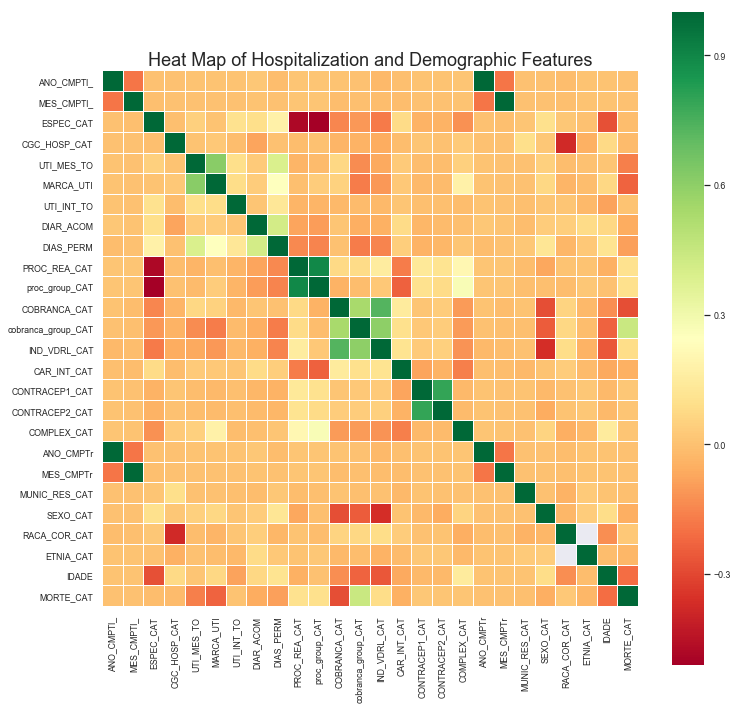

In [91]:
#Plot Demographics and Hospitalization Correlations

sns.set(font_scale=.8)

sns.heatmap(hospi_demo_corr, square=True, linewidths=.05, cmap='RdYlGn')

plt.title('Heat Map of Hospitalization and Demographic Features', fontsize = 18)

Text(0.5,1,'Heat Map of Hospitalization and Diagnosis Features')

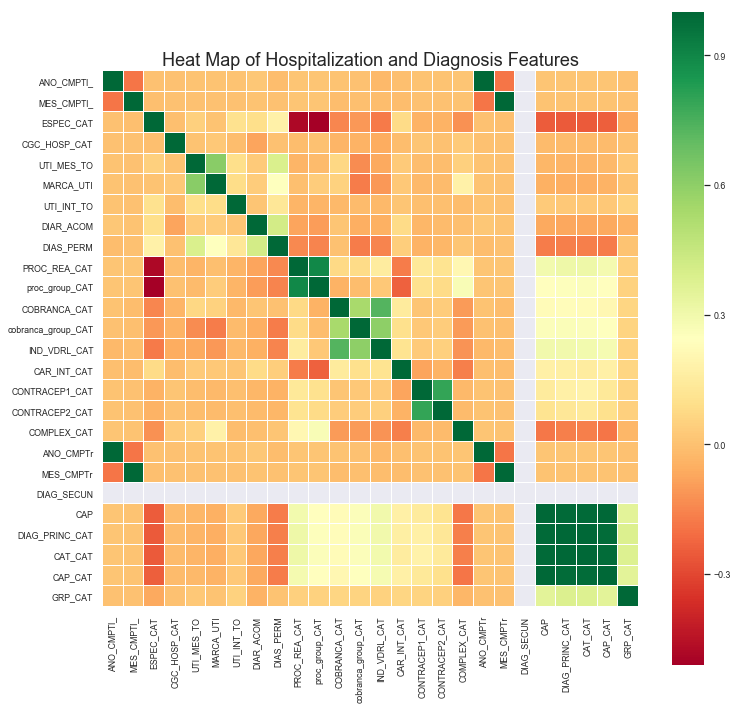

In [92]:
#Plot Diagnosis and Hospitalization Correlations

sns.set(font_scale=.8)

sns.heatmap(hospi_diag_corr, square=True, linewidths=.05, cmap='RdYlGn')

plt.title('Heat Map of Hospitalization and Diagnosis Features', fontsize = 18)

## Export Cleaned Diagnosis Data

> **The numerical categorical values are the ones that will be used in the model.**

In [93]:
hospi_data_clean.to_csv('AIH_sample_hospi.csv', index = False, 
                        na_rep= 'NaN', encoding='utf-8', chunksize = 50000)